# Boost ML networks on specific HW platform with Apache TVM on the example of Qualcomm Adreno™ GPU

_**Egor Churaev**_

*Sr. Software Engineer, Deelvin Solutions*

*Apache TVM committer*

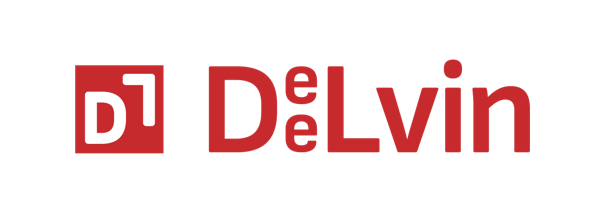

## Agenda 

- [Introduction to Apache TVM](#Introduction-to-Apache-TVM)
- [TVM architecture](#TVM-architecture)
- [Installing TVM](#Installing-TVM)
- [Model compilation with TVM](#Model-compilation-with-TVM)
- [Running on remote device via RPC](#Running-on-remote-device-via-RPC)
- [Adreno optimizations](#Adreno-optimizations)

# Introduction to Apache TVM

## Deployment challenge

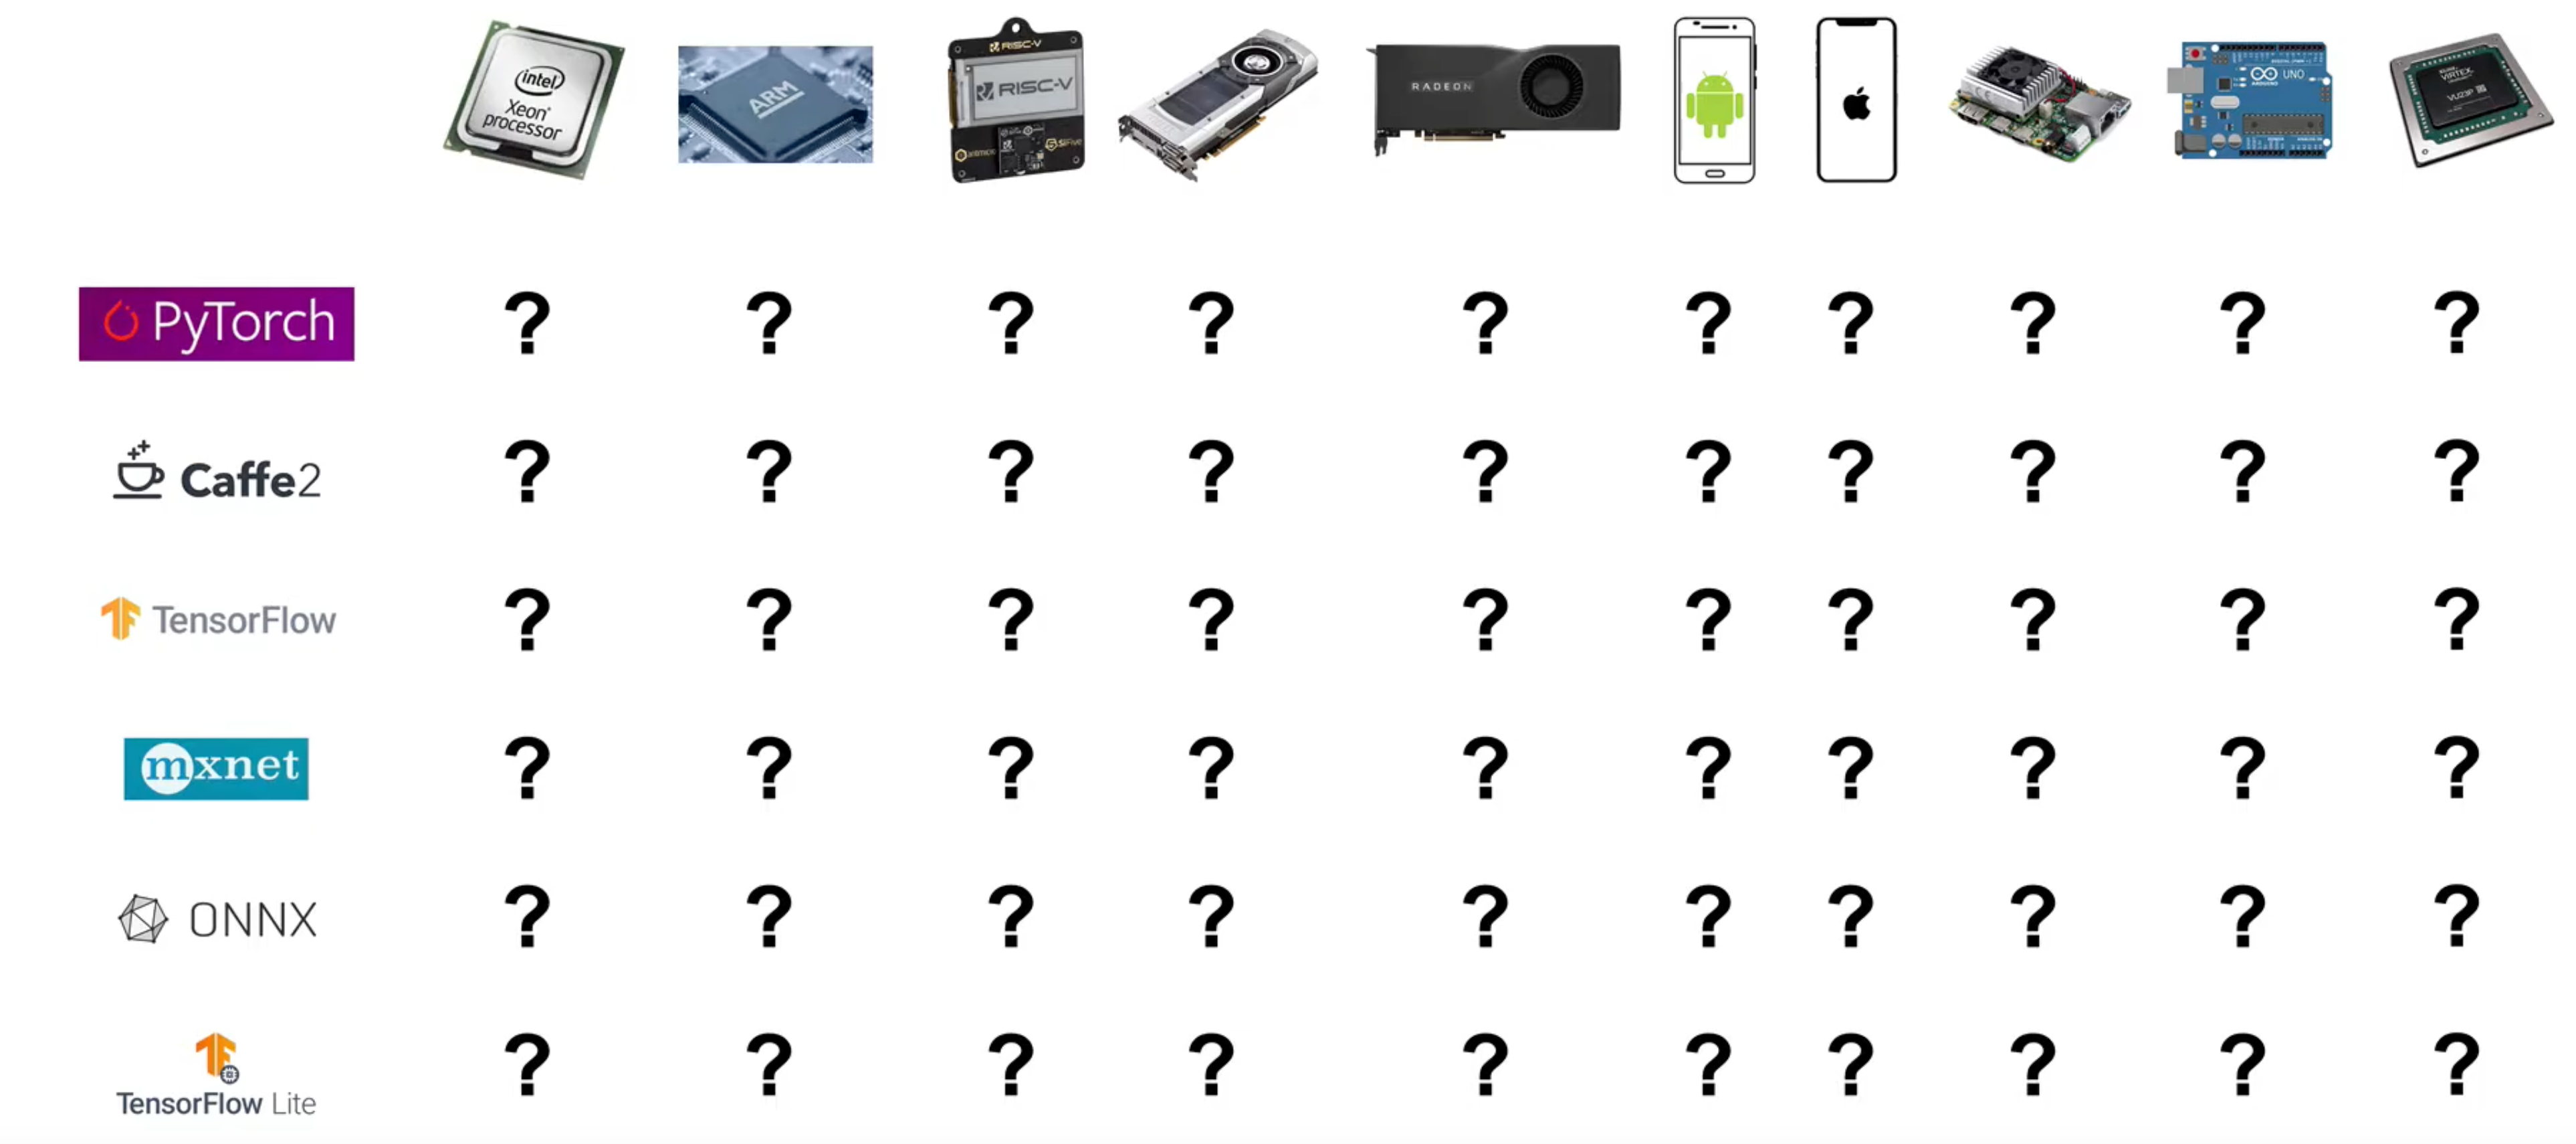

Imagine that you trained your model using one of the frameworks, such as: PyTorch, TensorFlow, MxNet, or something else. After the training, you're going to have to make a decision to where you want to deploy this trained ML model. On the top of the screen you can see a bunch of different hardware platforms. Choosing the best inference engine framework to run a model on a target device can be quite tricky. 

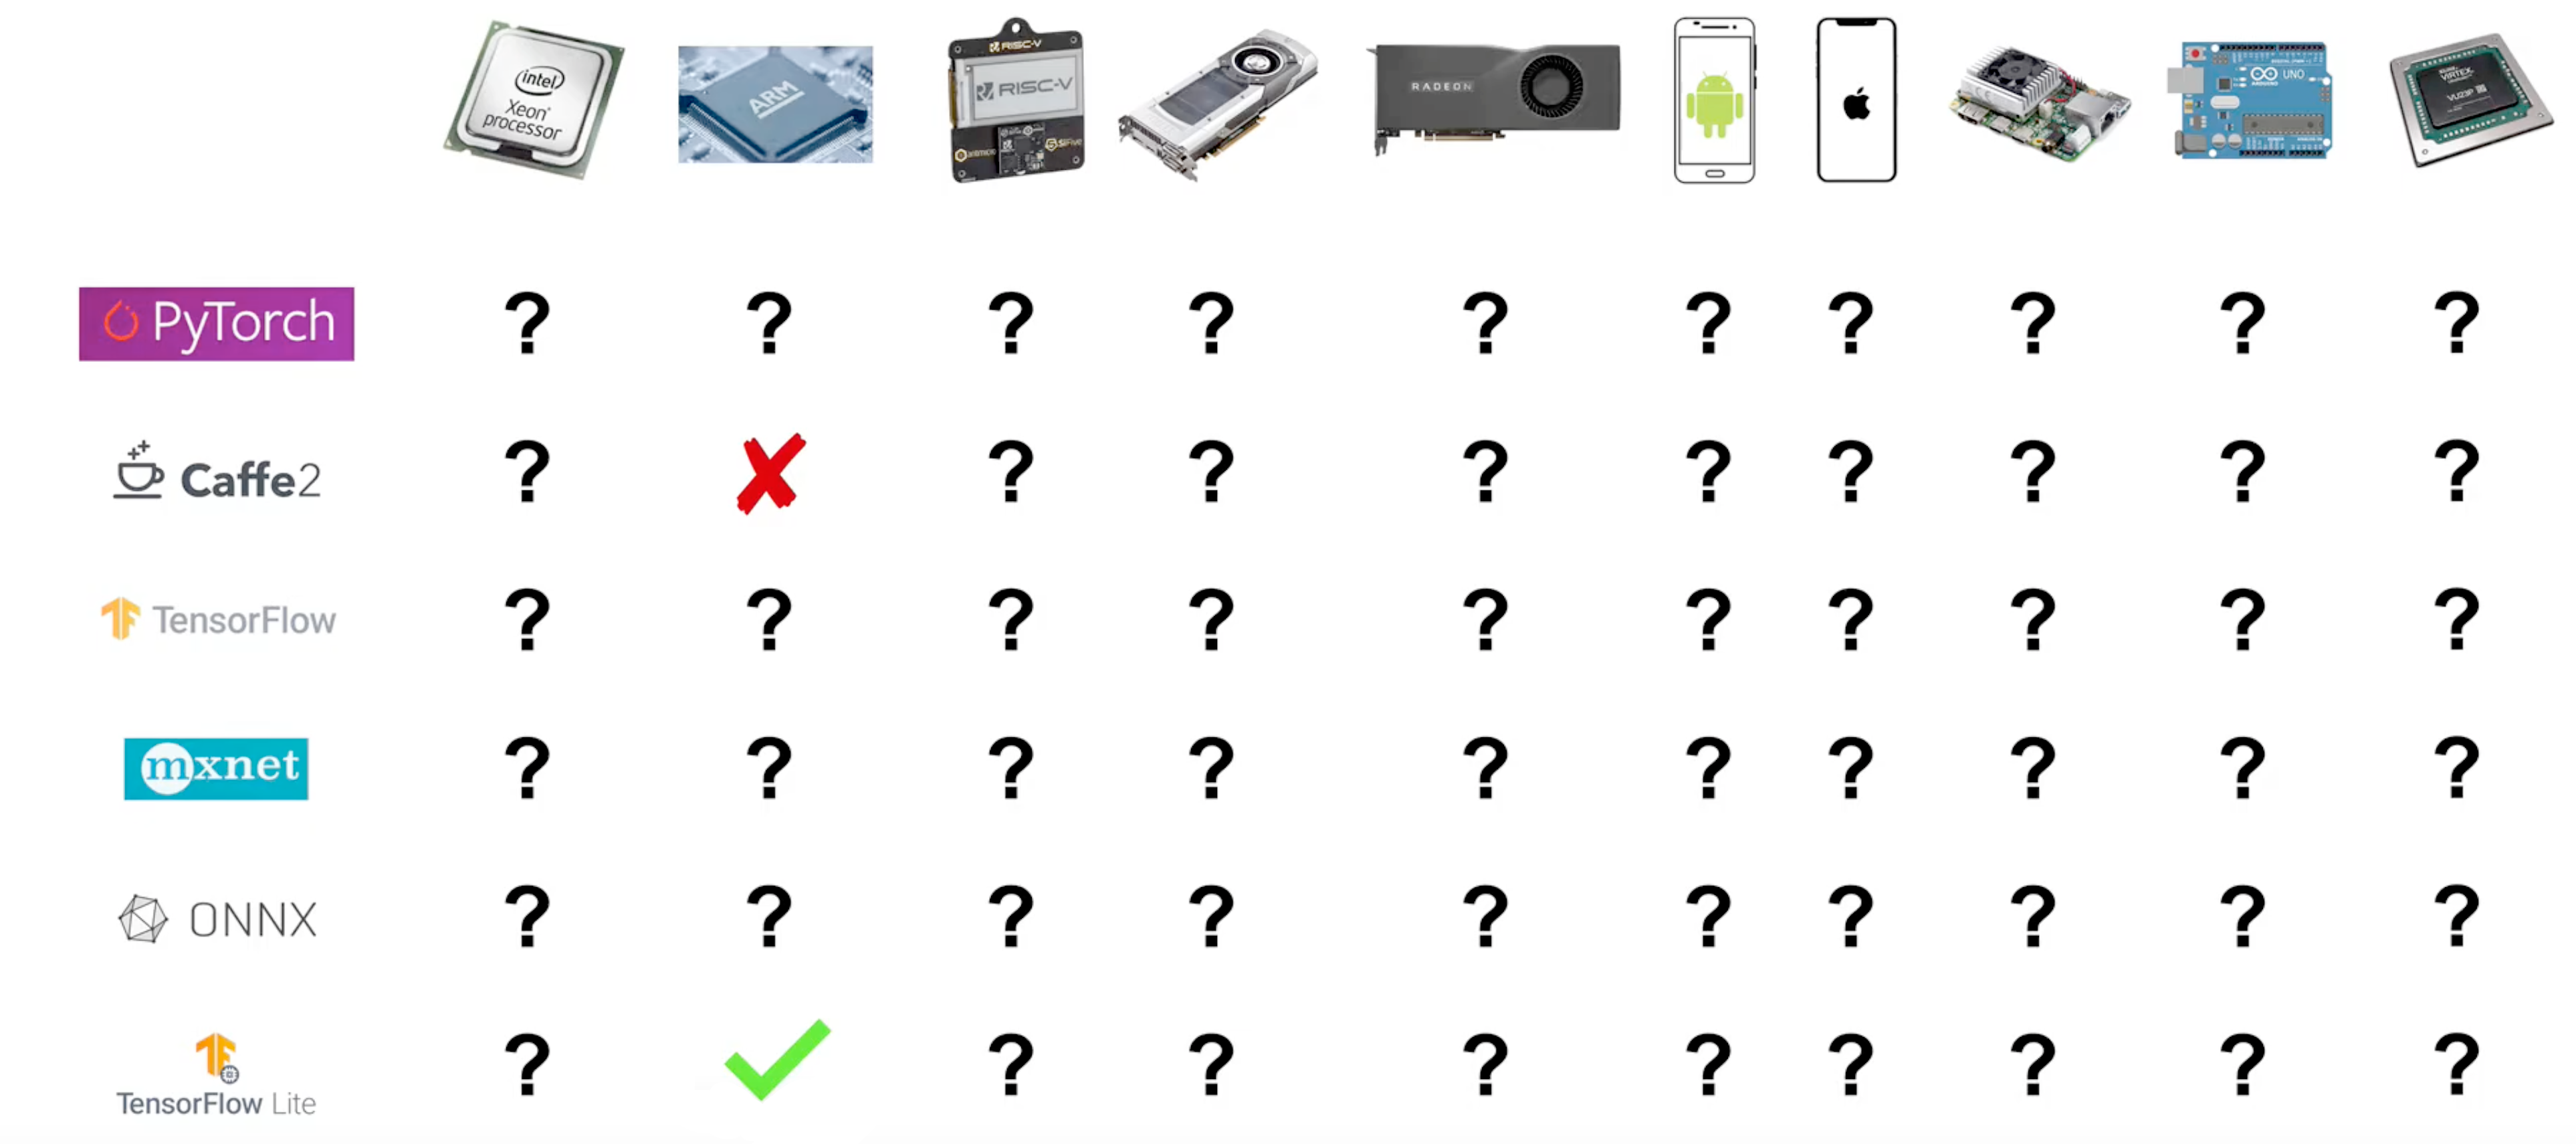

For example, if you want to deploy a TFLite model onto an ARM processor, you are in luck and you can use the TFLite interpreter and run your model efficiently.

But what if you want to deploy your caffe2 model on an ARM processor? So, you are not in luck and it won't be so easy to run you model... Caffe2 doesn’t have support for micro architectures. So which options do you have in this case?
1. You can maybe try to find a library that will allow you to deploy the model to your architecture.
2. You can rewrite the model into TensorFlow Lite, however this means you’d have to train again.
3. You can find some sort of converter that converts the model to a framework that you can then deploy to your hardware.

Here you can imagine how many deployment scenarious, you should take in your mind to run the model efficient on a new hardware. 

## Introducing TVM

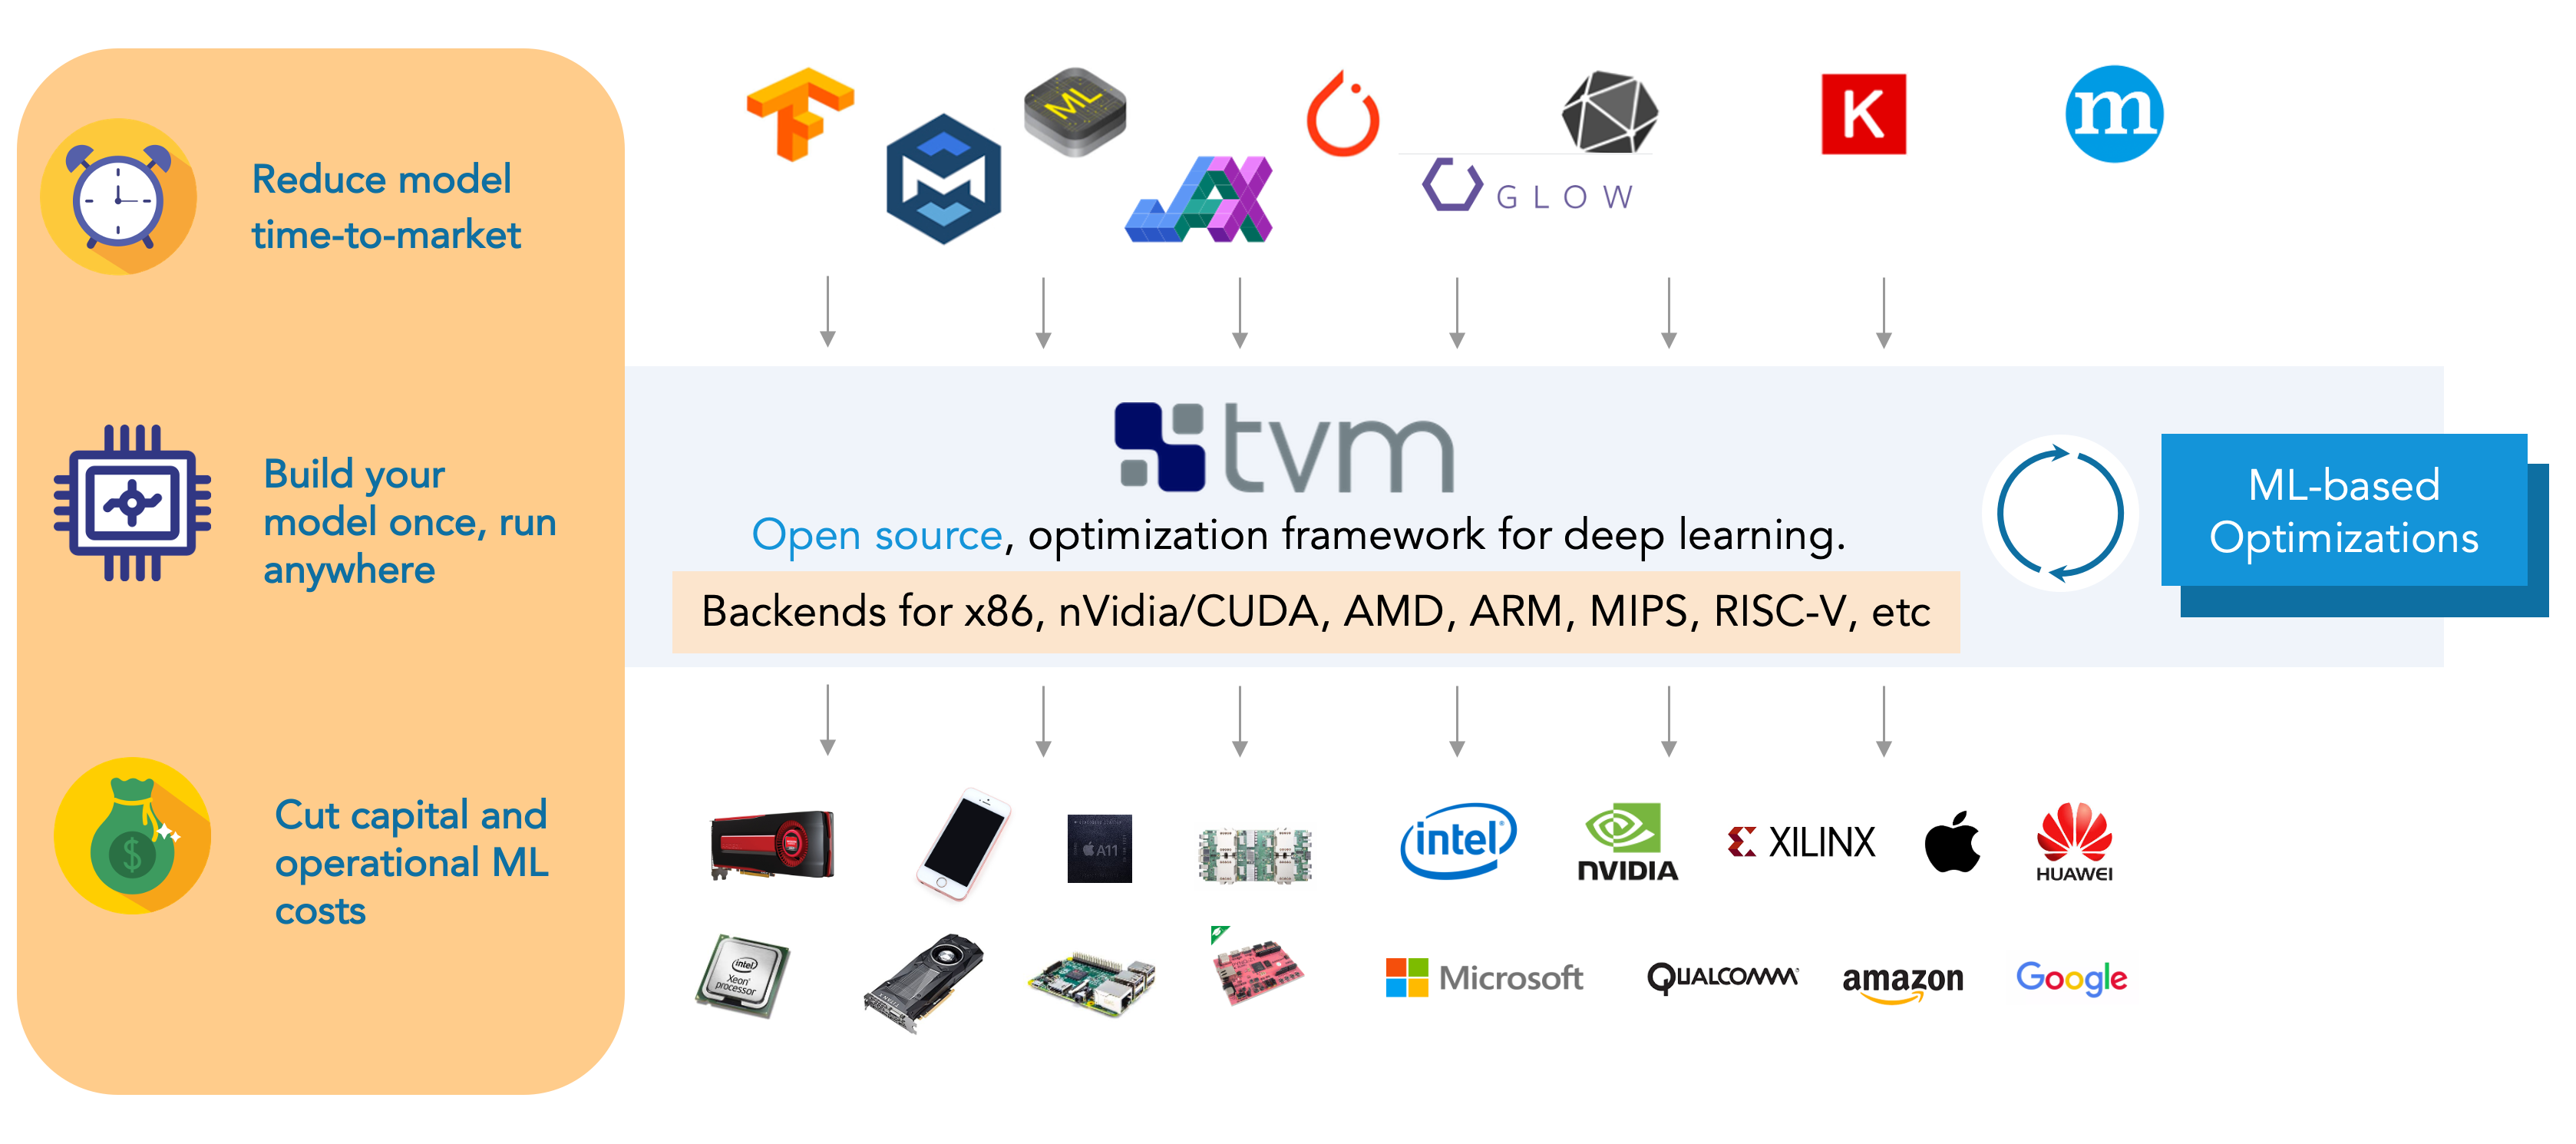

Thankfully there is a solution for this deployment problem and it is called TVM. TVM is the open source optimization framework for machine learning. It can adjust models from a number of different sources including PyTorch, TensorFlow, ONNX and others. And it can target a number of different architectures including x86, arm, nVidia GPUs, AMD GPUs etc.
It is also supported by a number of different operating systems including Linux, Mac, iOS, Android, Windows and others.

A huge contribution to the development of TVM is made by the company [OctoML](https://octoml.ai/), which provides its own solution that allows the users to simplify and speed up the process of deploying the model on any HW device. The OctoML product is based on Apache TVM, and many of the OctoML employees were at the origins of TVM. Many large companies use the OctoML product to automate the process of accelerating their models.

## What is the Apache TVM?

- A growing community: 820+ contributors, 10.1k stars on GitHub: https://github.com/apache/tvm
- Community owned
- Active discussion forum: https://discuss.tvm.apache.org/
- Regular meetups and conferences (e.g. https://www.tvmcon.org/)

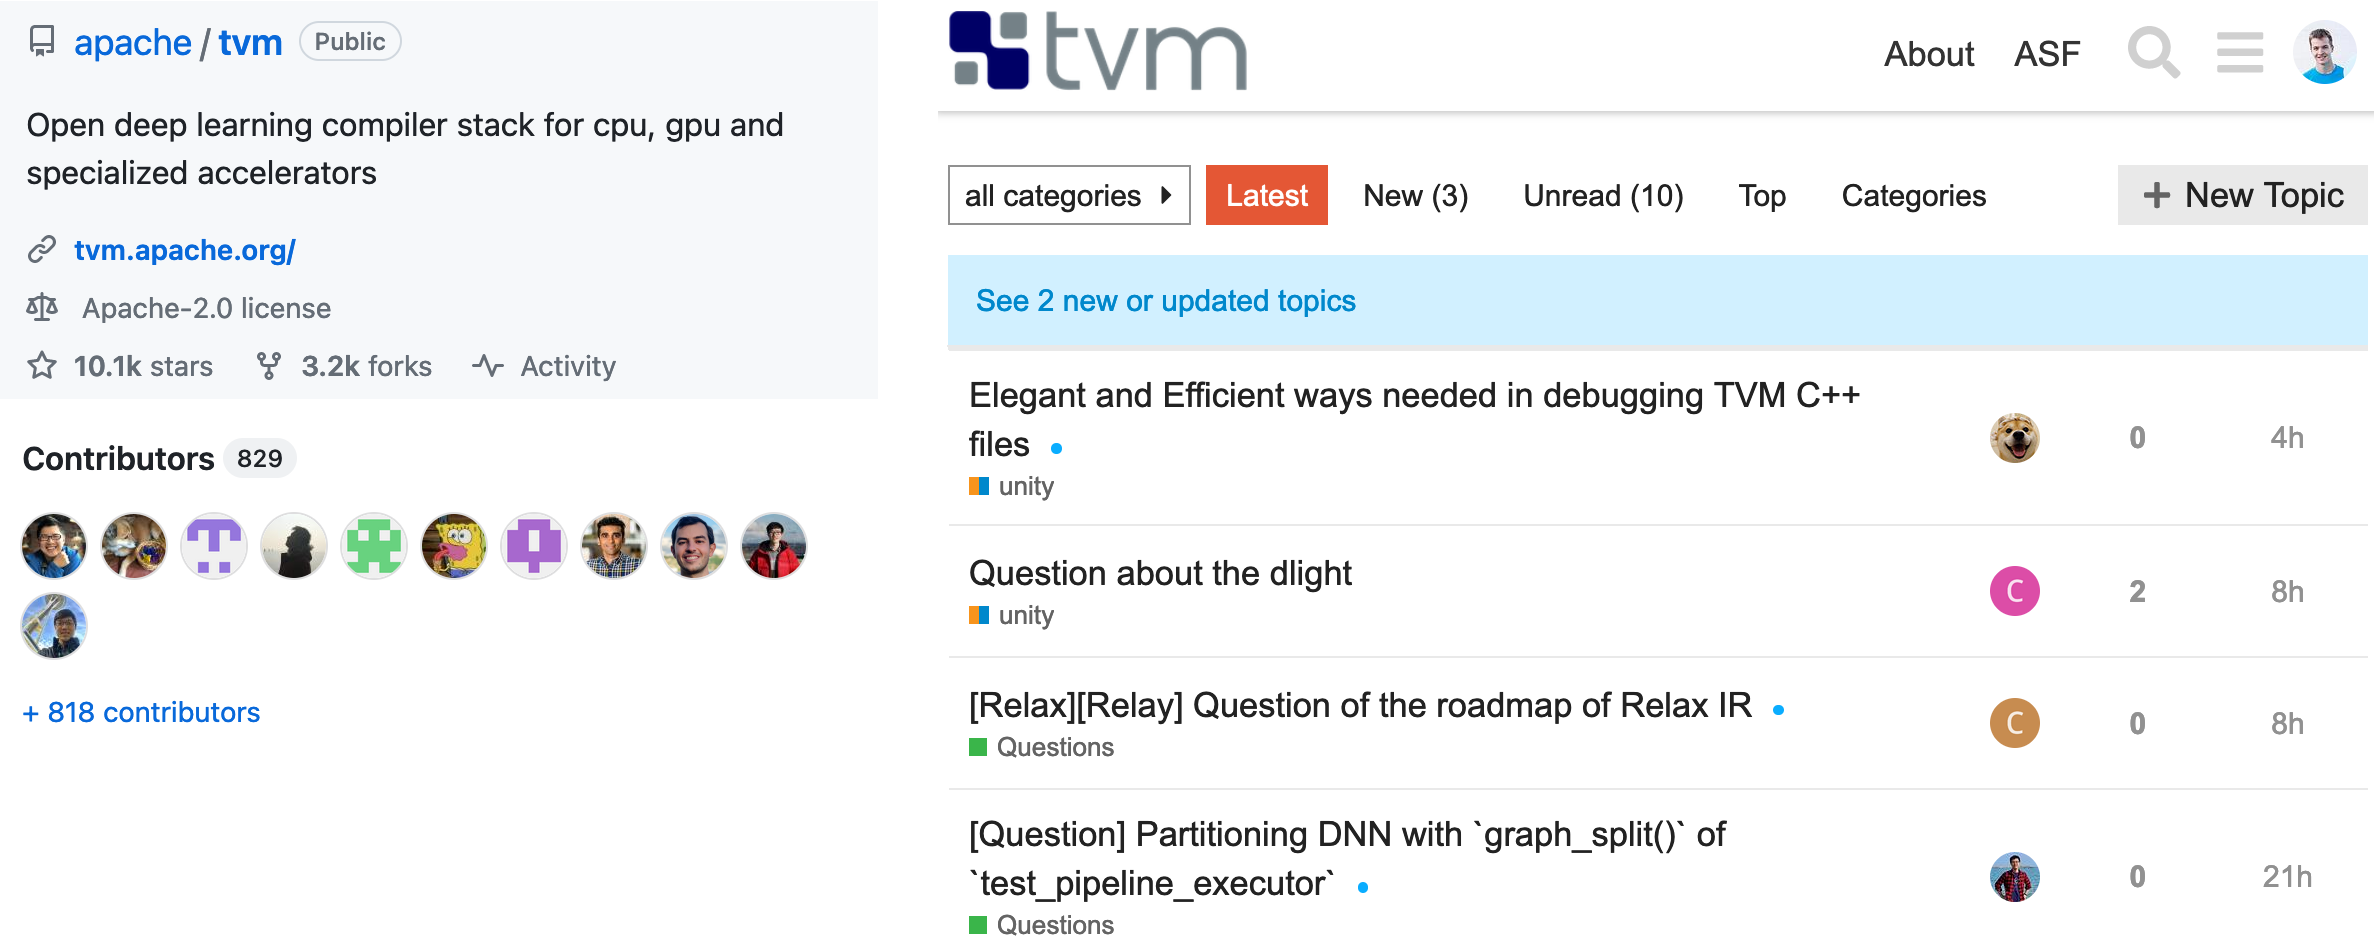

TVM has a growing community of more than 820 contributors and 10.1k stars on [github](https://github.com/apache/tvm). It’s graduated at the Apache Software Foundation. That means that it’s entirely community owned there is no one single company that controls TVM, and instead it enjoys contributions from a number of contributors across the industry. 

There is a very active [discussion forum](https://discuss.tvm.apache.org/) where anyone can come and ask questions related to TVM. This forum has many topics that range from planning for future features to reporting bugs and getting support for how to use TVM. 

Moreover, there are also regular meetups and conferences related to TVM.

## Who are the users of Apache TVM?

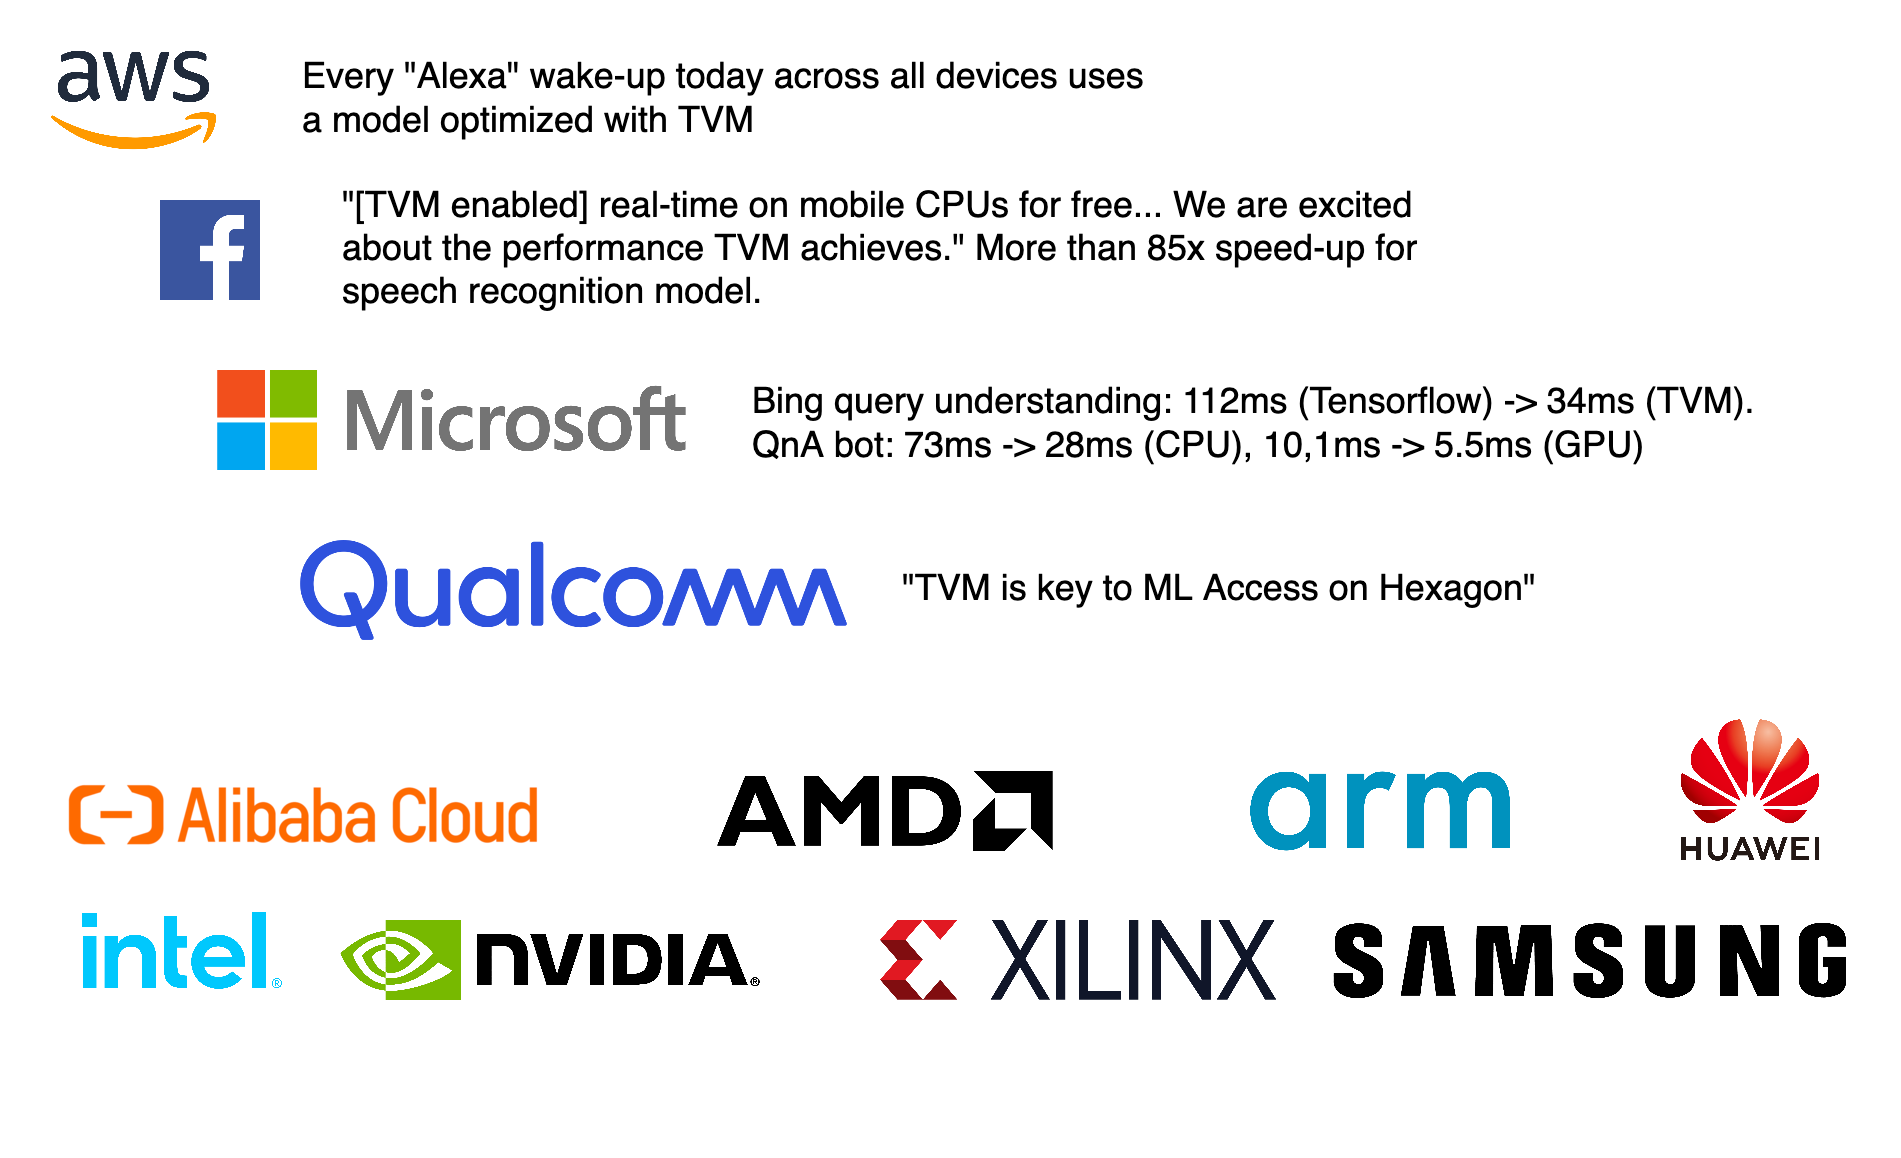

TVM has already had an impact on the industry. For example, every “Alexa” wake-up today across all devices uses a model optimized with TVM. At Facebook, TVM enabled real time on mobile CPUs for free. More than an 85 times speed-up for their speech recognition model.
Bing query understanding went from 112 milliseconds to 34 milliseconds using a TVM optimized model. And at Qualcomm, TVM is a key to ML Access on Hexagon. Also, there are many other Software and Hardware companies (such as Huawei, Intel, Samsung, AMD, arm and others) that are used TVM in their products.

## What problem does TVM address?

- Portability:
  - When there are limited hardware options to deploy your model.

One of the problems that TVM is looking to solve is the portability problem. When there are limited hardware options for you to deploy your model to. You need to be able to rely on a framework that will be able to take a model and target that particular hardware.

- Efficiency:
  - When you need to squeeze as much efficiency out of your target platform.

It’s also looking to address the problem of efficiency. When you need to get as much efficiency out of your target platform as you can. TVM has optimization options that let you optimize a model to target particular hardware.

- Software support:
  - When you need to build a software stack for your hardware system.

When you need to build a new software stack for your hardware system, TVM gives you the tools to accomplish that.

## Inference Engines: common techniques and differences

- Target independent optimizations (typically done as offline):
    - Constant Folding — decrease number of redundant calculations by replacing constant expressions and variables on their values.
    - Operations fusion - combine several operations into one compute function.
- Target specific optimizations:
    - Blocking, tilling to utilize better vectorization and kernel level parallelism.
    - Pattern matching techniques: map certain subgraphs to high level ops (e.g. recognize Conv pattern in low level TF graph).

Optimizations which are used in Inference Engines can be divided into two types. These are device-agnostic and device-specific optimizations. Device-agnostic optimizations usually happen offline (or at model compilation time). These optimizations include constant folding, Batch Norm fusion, Operations fusion, and others.

Device-specific optimizations can be selected in real time depending on the target device on which the model have to be run. These optimizations include blocking and splitting the workspace to better utilization of vector instructions and load the computing power of the device. As well as pattern matching - finding patterns in the graph that represent high-level operations and calling these operations (for example, finding a convolution pattern in a low-level TF graph).

<div style="display:flex;width:100%;height:auto;">
    <div style="background-color:aliceblue;padding:10px;width:50%;margin:10px;">
        <div style="margin:10px;"><center><b><u>OPTIMIZED IMPLEMENTATIONS OF PRIMITIVES</u></b></center></div>
        <div style="display:flex;width:100%;height:auto;">
            <div style="width:47%;">
                <center>Heuristics (layout, primitive selection implementation)</center>
            </div>
            <div style="width:6%;">
                <center>+</center>
            </div>
            <div style="width:47%;">
                <center>Optimized primitives from low-level libraries (cuDNN, oneDNN, ACL)</center>
            </div>
        </div>
        <div style="margin:10px;"><center><b>(OpenVINO, TensorRT)</b></center></div>
    </div>
    <div style="background-color:AntiqueWhite;padding:10px;width:50%;margin:10px;">
        <div style="margin:10px;"><center><b><u>OPTIMIZING THE IMPLEMENTATION BY THE COMPILER</u></b></center></div>
        <div style="display:flex;width:100%;height:auto;">
            <div style="width:47%;">
                <center>Tensor compiler</center>
            </div>
            <div style="width:6%;">
                <center>+</center>
            </div>
            <div style="width:47%;">
                <center>Large search space for optimizations</center>
            </div>
        </div>
        <div style="margin:10px;"><center><b>(Halide, Apache TVM)</b></center></div>
    </div>
</div>

There are several ways to determine which of the device-specific optimizations should be applied to the model to run it efficiently on the target device. For example, engineers can write a heuristic that, based on data layout or some other criteria, selects the most optimal implementation for efficient execution of a primitive. Often, optimized primitives from low-level libraries such as cuDNN, oneDNN and others are often used in the implementation.

Another approach is based on the using of a tensor compiler and a large search space for the optimal solution. Thus, the compiler finds the most optimal configuration (using vectorization or efficient data decomposition in memory) for executing primitives on the target device.

# TVM architecture

## Classical compiler

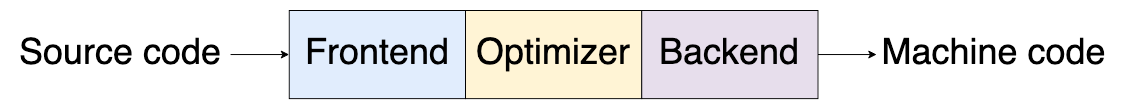

So, let’s start from a classical compiler overview. It will help us to understand an idea of TVM. What is a compiler? A compiler is software technology that takes programs written by humans and turns them into something computers can understand. The original compilers freed engineers from having to master the arcane operations of computer hardware and allowed even begetters to build fast and efficient software applications. And without good compilers the entire world of software would be much slower costlier and  error-prone. 

On the picture above, we have a three-phase static compiler. The frontend parses the source code, checks it for errors and builds an abstract syntax tree to represent the input code. In the middle the optimizer is responsible for doing a broad variety of transformation to try to improve the code’s running time like eliminating redundant computations. The optimizer also is independent of the language on the left and the hardware target on the right. And then finally the backend or code generator maps the code onto the target instruction set. And in addition to making correct code, it’s responsible for generating good code that takes advantages of unusual features of the supported backend architecture. Common parts of compiler backends include instruction selection, registre allocation and instruction scheduling. 

By the way jvm is an example of this implementation model. Which uses a java byte code as the interface between the frontend and the optimizer.

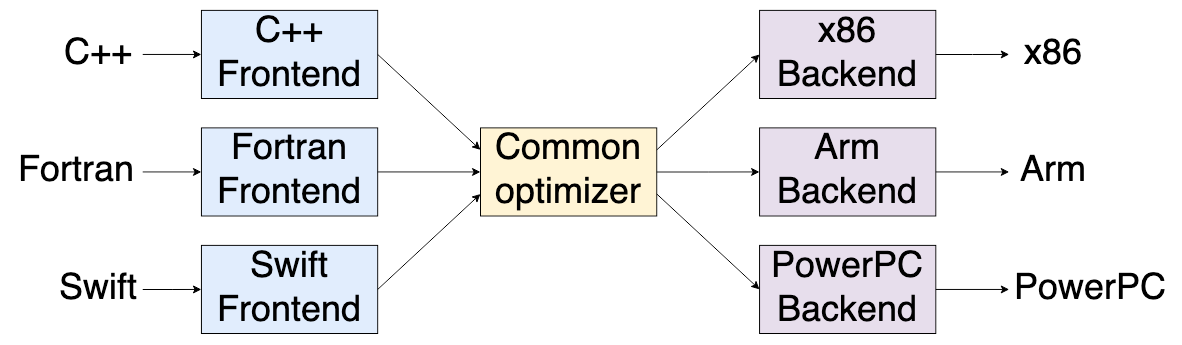

The way classical compilers typically work is: there are languages that come in on the left, and the common compiler bridges those different languages into different target hardwares. 

This architecture allows support a large number of different programming languages and HW targets without having to implement general optimizations. Usually, frontends generate some intermediate representation of the code (IR - Intermediate Representation, for example, the LLVM compiler generates LLVM IR), which is passed to the optimizer. If the compiler uses an intermediate representation of the code, then the frontend can be written for any language, without the need to change the optimizer or backend. Also, the backend can be written for any architecture, and at the same time, the source code from all frontends will automatically be able to compile with this backend.

With this design, porting the compiler to support a new source language, like Pascal for example, requires implementing a new frontend but the existing compiler and backend design can be reused. In the LLVM project which is a very common compiler, this is the technique that used, and it supports many families of languages, like gcc, java, .net, python, ruby, haskell and OpenCL.

## ML compiler

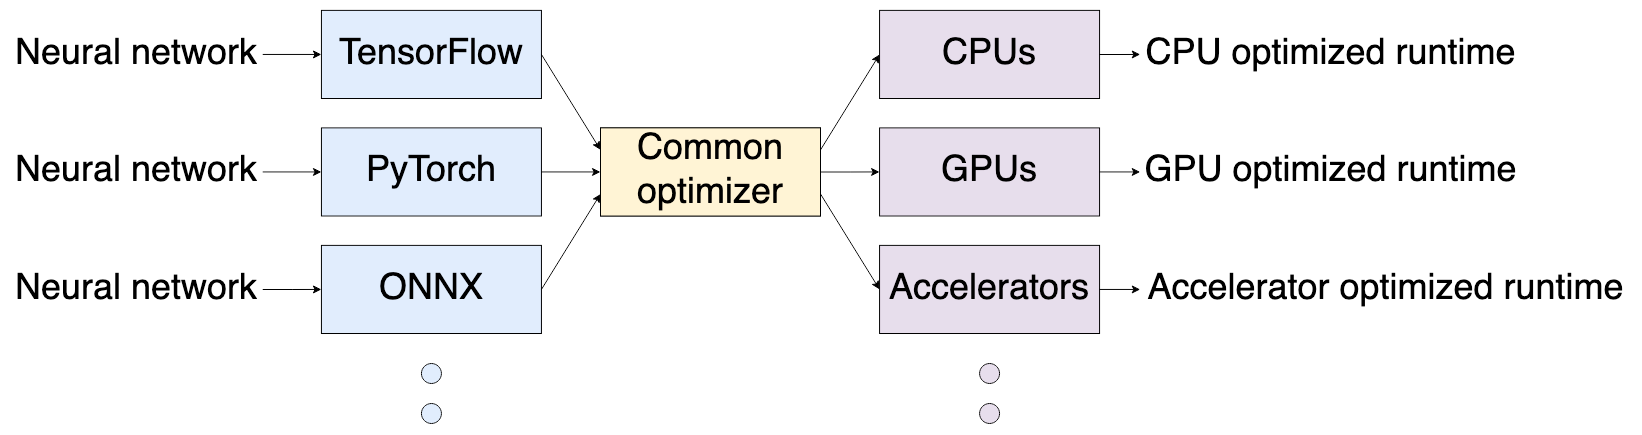

Compilers for machine learning do something similar. On the left, the ML compiler receives a model in the format of one of the ML frameworks as input. The model is converted to an intermediate representation format and the optimizer applies various optimizations. Next, code is generated for different hardware chipsets. It might be CPUs, GPUs, or other accelerators like FPGA, DSPs or NPUs. 


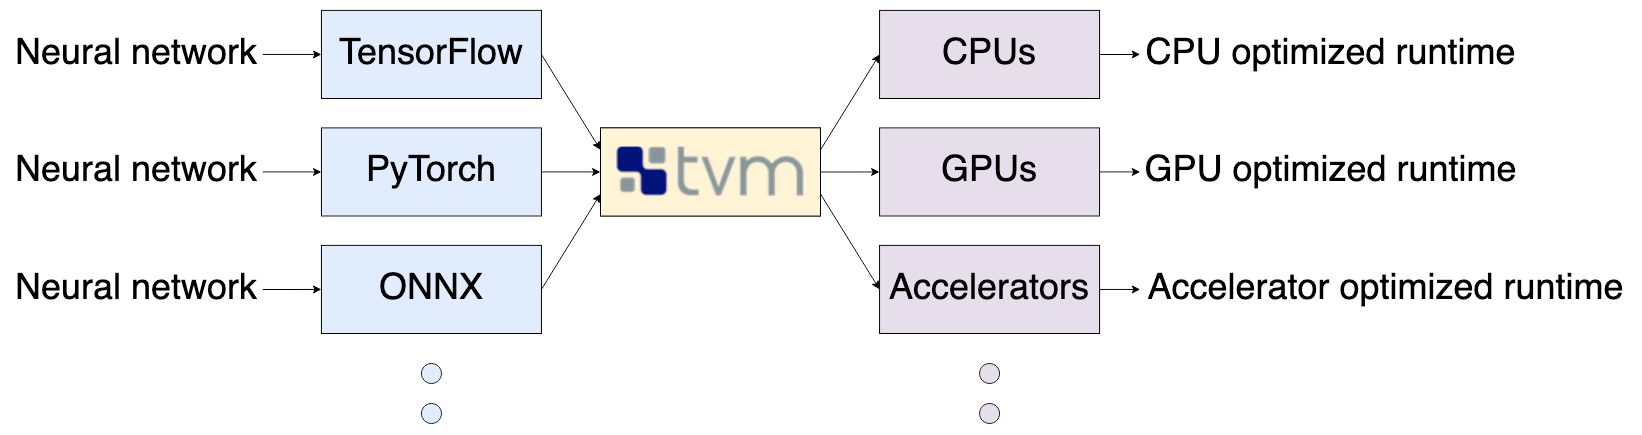

And that is exactly what TVM is a nutshell. It bridges different deep learning frameworks like PyTorch, TensorFlow, ONNX and other to different hardware backends. TVM performs optimizations at the graph and operator levels to ensure that the performance of DL models is portable across different hardware platforms.


## How does TVM work?

1. **Graph Level Optimizations**<br>
   Rewrites dataflow graph (nodes and edges) to simplify the graph and reduce device peak memory usage.
2. **Operator Level Optimizations**<br>
   Hardware target-specific low-level optimizations for individual operators/nodes in the graph.
3. **Efficient Runtime**<br>
   TVM optimized models run in the lightweight TVM Runtime System, providing a minimal API for loading and executing the model in Python, C++, Rust, Go and others.

Let’s take a look how does TVM work. At the high level, TVM has three bags of tricks that is does to speed up your model. One of them is Graph Level Optimizations. This essentially rewrites the data flow graph, like the directed cyclical graph of your neural network, the nodes and edges to simplify the graph and reduce device peak memory usage. The type of graph flow optimizations TVM does:
- Operator fusion, which fuses multiple small operations together. 
- Constant folding, which pre-computes graph parts that can be determined statically, saving execution costs. 
- Static memory planning pass, which pre-allocates memory to hold each intermediate tensor. - Data layout transformation, which transform into internal data layouts into backends friendly formats. 

So those are four examples of graph level optimizations.

In addition, TVM does operator level optimizations which are more hardware target specific lower level optimizations. For individual nodes or operators in the graph.

And finally when you get optimized your model, you run that in efficient tvm runtime it’s lightweight runtime system that provides a minimal API for  loading and executing your optimized model in python,  C++, Rust, Go, Java or JS.


## TVM workflow

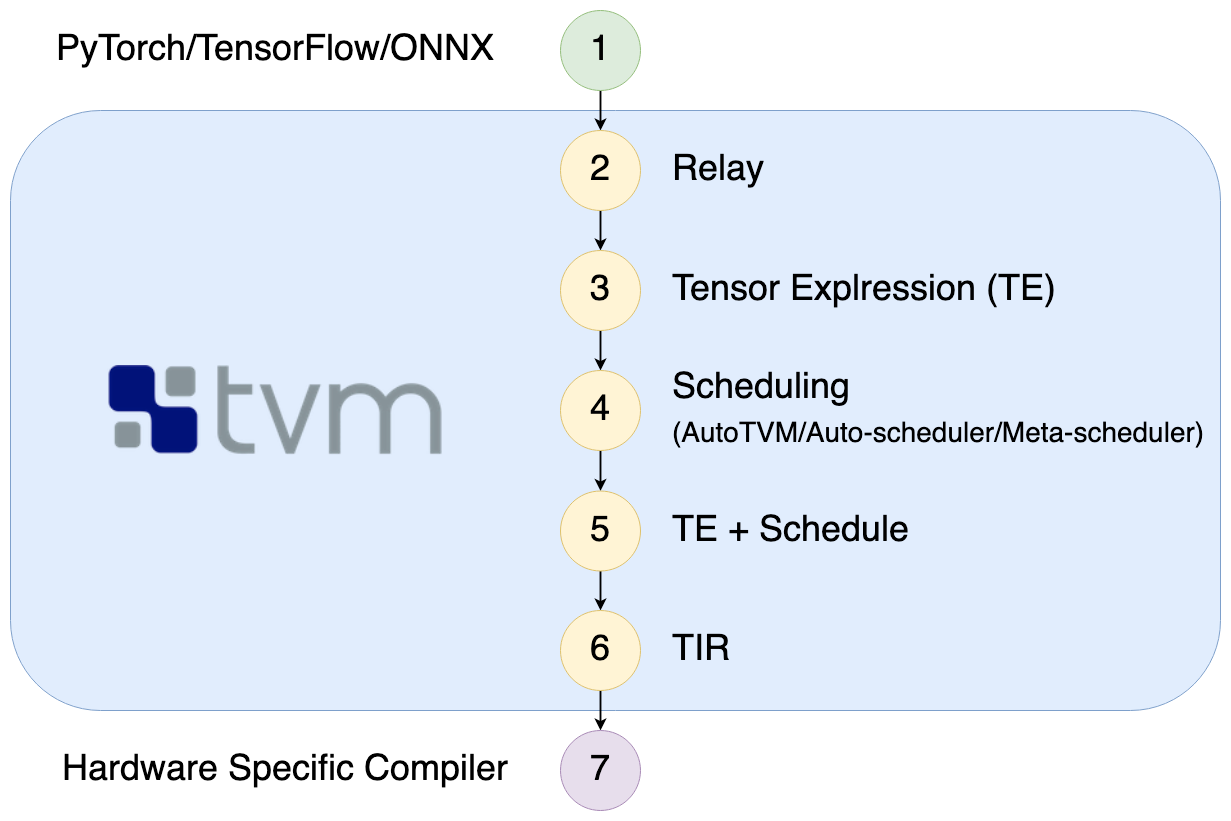

On the picture above is a general diagram of the internal structure of the TVM. The main goal of a compiler such as TVM is to use optimizations to speed up the model and run it efficiently on the target device. At the same time, the accuracy of the model should remain at the same level as it was before compilation. Let's consider this scheme in more detail.

1. **Import model.** You import your neural network into the TVM internal format, which is Relay. The importer just takes a TensorFlow, PyTorch or neural network in other format, and builds a fragment of the AST out of it, then this AST transforms to Relay. 
2. **Relay.** Relay is an intermediate representation format in TVM. Relay essentially provides a deep learning framework-agnostic way of representing that neural network. That is ideal for further optimizations, both graph and hardware operator level optimizations.
3. **Tensor Expression (TE).** In step three for every operator or node in your graph we have a corresponding tensor expression which tells us how to implement an operation like matmul or convolution in a hardware-agnostic way. Relay can take the tensor expressions (TE) based on the meaning and then combine and compile it to give you a more efficient version of it. One way to think of it, this is like you give TVM a recipe to cook dinner that’s like your higher level neural network in tensorflow. And then TVM can reorder that recipe and change a few steps to be able to cook the dinner more efficiently, but the end result you get is the same meal.
4. **Scheduling.** The forth step is scheduling. The older version of this was Auto-TVM, the next generation version of this is called Auto-Scheduler, the latest generation is Meta-Scheduler. This is mostly carried out by automation. So you shouldn’t have to worry about it. Essentially, the auto scheduling will produce a schedule that optimize some performance on a given target based on a given description of a TE. So TVM defines a search space of possible schedules to explore and then it searches for the ideal schedule.
5. **TE + Schedule.** The schedule that was found in the previous step is applied to the tensor expression to get the final code, and a TIR is generated from it.
6. **Tensor IR (TIR).** TIR is a low level intermediate representation in TVM. The TIR already contains the implementations of the operators that will be executed on the target device, but the implementation of these operators is still hardware-agnostic.
7. **Hardware specific code generation.** A hardware-specific code is generated from the received TIR code. Thus, when we compile under the CPU, LLVM is used to generate the final code. If it is necessary to run the model on the GPU, then a code generator for OpenCL, Cuda, Metal or some other is used.

# Installing TVM

## How can TVM be installed?

Detailed description can be found in the official documentation: https://tvm.apache.org/docs/install/index.html

Installation options:
- Building TVM locally from source code
- Using pre-build TVM from Docker container
- Installing TVM locally via pip (Linux, MacOS)

There are three possible options: building from sorce code, using Docker container and installing via pip. We won't consider using TVM in Docker container. It is described in details in the documentation. So, please, go to [tvm.apache.org](https://tvm.apache.org/) if you need more information about running TVM in Docker.

## Building TVM from source code. Compiling library

- Download the TVM source code from GitHub:
  ```bash
  git clone https://github.com/apache/tvm.git; cd tvm
  ```
- Collect submodules:
  ```bash
  git submodule update --init --recursive
  ```

We need to clone TVM repository from GitHub and update all submodules.

- Install all dependencies: https://tvm.apache.org/docs/install/from_source.html

Please read by the link above about all dependencies which you might need to build TVM on your system.

- Create build directory:
  ```bash
  mkdir build && cd build
  ```
- Configure and run build:
  ```bash
  cmake -DCMAKE_BUILD_TYPE=Release -DUSE_LLVM=ON -DUSE_RANDOM=ON -DUSE_GRAPH_RUNTIME=ON -DUSE_SORT=ON  .. && make -j4
  ```

If the system cannot find LLVM, then it is necessary to pass the path to `llvm-confing` to the `-DUSE_LLVM` option.
After build you'll have all necessary TVM libraries.

## Building TVM from source code. Installing TVM module to Python

- Adding paths to TVM module in `PYTHONPATH`:
  ```bash
  export TVM_HOME=/path/to/tvm
  export PYTHONPATH=$TVM_HOME/python:${PYTHONPATH}
  ```
- If you need to run an application which has dependencies on TVM libraries then you need to specify `LD_LIBRARY_PATH` or `DYLD_LIBRARY_PATH` (in case of Mac OS) variables:
  ```bash
  export LD_LIBRARY_PATH=$TVM_HOME/build:${LD_LIBRARY_PATH}
  ```

Add directory with TVM python modules to `PYTHONPATH` and specify where TVM libraries can be found by using `LD_LIBRARY_PATH` or `DYLD_LIBRARY_PATH`. It should be done to use TVM from Python and in applications which were linked with TVM.

## Installing TVM via pip

- Check available versions for installing:

In [1]:
!pip install apache-tvm==

ERROR: Could not find a version that satisfies the requirement apache-tvm== (from versions: 0.9.0, 0.10.0)
ERROR: No matching distribution found for apache-tvm==


The command above will print all available versions in Pip.

- Install the latest stable version of TVM:

In [ ]:
!pip install apache-tvm

- Or select specific version for installation:

In [ ]:
!pip install --pre apache-tvm~=0.11

Pre-release versions of TVM are available for installation on Linux, so on Mac OS I'm using TVM version which was built from source code.

- Check TVM version:

In [2]:
import tvm
print(tvm.__version__)

0.14.dev0


# Model compilation with TVM

## Import model to TVM

- Documentation where compilation of models from different frameworks is described: https://tvm.apache.org/docs/how_to/compile_models/index.html
- Interface, which is used for the models importing:
  ```python
    import tvm
    from tvm import relay
    
                  relay.frontend.from_coreml(coreml_model, shape_dict)
                  relay.frontend.from_mxnet(mxnet_model, shape_dict)
    mod, params = relay.frontend.from_pytorch(scripted_model, shape_list)
                  relay.frontend.from_onnx(onnx_model, shape_dict)
                  relay.frontend.from_keras(keras_model, shape_dict)
  ```

A detailed description of how you can import the model from various ML frameworks can be found on the [documentation site](https://tvm.apache.org/docs/how_to/compile_models/index.html). The above is an example of interfaces that can be used to load models from various frameworks. Basically, the interface of the functions is similar. Sometimes additional parameters are added for individual importers, such as the layout that is used in the model, or the data type.

- Import python modules:

In [3]:
import onnx
import os
from tvm.contrib.download import download_testdata
from PIL import Image
import numpy as np
import tvm.relay as relay
import tvm
from tvm.contrib import graph_executor

/Users/echuraev/.local/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


- Download and load MobileNet v2 model to ONNX:

In [4]:
model_url = (
    "https://github.com/onnx/models/raw/main/"
    "vision/classification/mobilenet/model/"
    "mobilenetv2-10.onnx"
)

model_path = download_testdata(model_url, "mobilenetv2-10.onnx", module="onnx")
onnx_model = onnx.load(model_path)

# Seed numpy's RNG to get consistent results
np.random.seed(0)

- Prepare input:

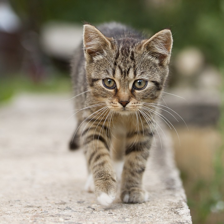

In [5]:
img_url = "https://s3.amazonaws.com/model-server/inputs/kitten.jpg"
img_path = download_testdata(img_url, "imagenet_cat.png", module="data")

# Resize it to 224x224
resized_image = Image.open(img_path).resize((224, 224))
display(resized_image)

img_data = np.asarray(resized_image).astype("float32")

# Our input image is in HWC layout while ONNX expects CHW input, so convert the array
img_data = np.transpose(img_data, (2, 0, 1))

# Normalize according to the ImageNet input specification
imagenet_mean = np.array([0.485, 0.456, 0.406]).reshape((3, 1, 1))
imagenet_stddev = np.array([0.229, 0.224, 0.225]).reshape((3, 1, 1))
norm_img_data = (img_data / 255 - imagenet_mean) / imagenet_stddev

# Add the batch dimension, as we are expecting 4-dimensional input: NCHW.
img_data = np.expand_dims(norm_img_data, axis=0)

Here we download a picture with cat and do some preprocessing.

- Import model to TVM:

In [6]:
target = "llvm"

# The input name may vary across model types. You can use a tool
# like Netron to check input names
input_name = "input"
shape_dict = {input_name: img_data.shape}

mod, params = relay.frontend.from_onnx(onnx_model, shape_dict)

Here we specify `target = llvm` that means that we will run the model on a host CPU. To import model from ONNX to TVM, we should call function `relay.frontend.from_onnx` which takes two parameters as input:
- `onnx_model` - object with loaded ONNX model.
- `shape_dict` - dictionary with input names and their shapes.

Function `from_onnx` returns two objects:
- `mod` - model in TVM intermediate format (Relay).
- `params` - constant parameters (weights) of the model.

We can also print `mod` (by calling `print(mod)`) and then we will see the model in `Relay` format. If we print the `params` then we can see the arrays with numbers.

- Build model:

In [7]:
with tvm.transform.PassContext(opt_level=3):
    lib = relay.build(mod, target=target, params=params)

One or more operators have not been tuned. Please tune your model for better performance. Use DEBUG logging level to see more details.


Before building the model, we specify the `PassContext` which will be used during build. `PassContext` allows you to control which optimizations will be applied at the graph level. If `PassContext` was not specified, then by default the `opt_level=2` will be used. You can specify a different level of optimizations. You can read more [here](https://tvm.apache.org/docs/reference/api/python/relay/transform.html#tvm.relay.transform.build_config).

Message `One or more operators have not been tuned.` tells us that the model has not been configured for the target device and, most likely, the performance will be far from ideal.

- Define function to evaluate model performance:

In [8]:
def evaluate_performance(lib, dev, data, input_name):
    # upload parameters to device
    module = graph_executor.GraphModule(lib["default"](dev))
    module.set_input(input_name, data)
    module.run()
    output = module.get_output(0).numpy()

    # evaluate
    print("Evaluate inference time cost...")
    print(module.benchmark(dev, number=100, repeat=3))
    return module, output

It is necessary to define a function that will be used to estimate the running time of the model. 

The function takes four arguments:
- `lib` - model which has been compiled by TVM.
- `dev` - the device where the model should be executed.
- `data` - input data.
- `input_name` - name of the input tensor.

First, we create a [GraphModule](https://tvm.apache.org/docs/reference/api/python/graph_executor.html#tvm.contrib.graph_executor.GraphModule) object which is used for runing model. Next, we set inputs for the model and run it. To evaluate performance of the model, function [benchmark](https://tvm.apache.org/docs/reference/api/python/graph_executor.html#tvm.contrib.graph_executor.GraphModule.benchmark) is used. This function runs the model specified number of times and calculates average execution time.

- Add function to check accuracy:

In [9]:
def check_output(output):
    from scipy.special import softmax

    # Download a list of labels
    labels_url = "https://s3.amazonaws.com/onnx-model-zoo/synset.txt"
    labels_path = download_testdata(labels_url, "synset.txt", module="data")

    with open(labels_path, "r") as f:
        labels = [l.rstrip() for l in f]

    # Open the output and read the output tensor
    scores = softmax(output)
    scores = np.squeeze(scores)
    ranks = np.argsort(scores)[::-1]
    for rank in ranks[0:5]:
        print("class='%s' with probability=%f" % (labels[rank], scores[rank]))

In this function we download a file with labels and map the models output to these labels. Top 5 are printed.

- Run model on CPU and measure its inference time:

In [10]:
dev = tvm.device(str(target), 0)
_, tvm_output = evaluate_performance(lib, dev, img_data, input_name)

Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   8.8980       8.4767      10.4040       7.8132       1.0988                  


Function [tvm.device](https://tvm.apache.org/docs/reference/api/python/runtime.html#tvm.runtime.device) is used for creating an object of TVM device which should be used for running model. With target `llvm`, CPU device is used.

Function `evaluate_performance` prints the execution time of the model.

- Check output:

In [11]:
check_output(tvm_output)

class='n02123159 tiger cat' with probability=0.456480
class='n02123045 tabby, tabby cat' with probability=0.452542
class='n02124075 Egyptian cat' with probability=0.049952
class='n02127052 lynx, catamount' with probability=0.033805
class='n02123394 Persian cat' with probability=0.001530


Here we can see that the model works correctly because it detects cat on the picture with cat.

# Running on remote device via RPC

## What is cross compilation?

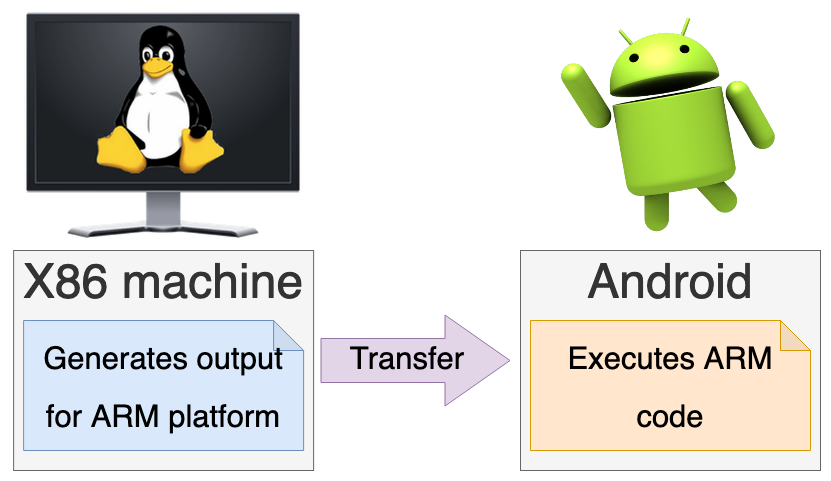

Cross-compilation is the compilation of a program for a platform with a  different architecture from the one on which the assembly is performed. The figure above shows an example. On a computer with x86 architecture, we need to compile a program for Android. To do this, a compiler that generates machine code for the ARM architecture is used, then the resulting executable file is sent to the Android device and can be executed there.

Such compilation is useful when you need to get an execution file for a platform that is not available, or in cases where compilation on the target platform is impossible or impractical (for example, this applies to mobile systems or microcontrollers with a minimum amount of memory).

## What is RPC?

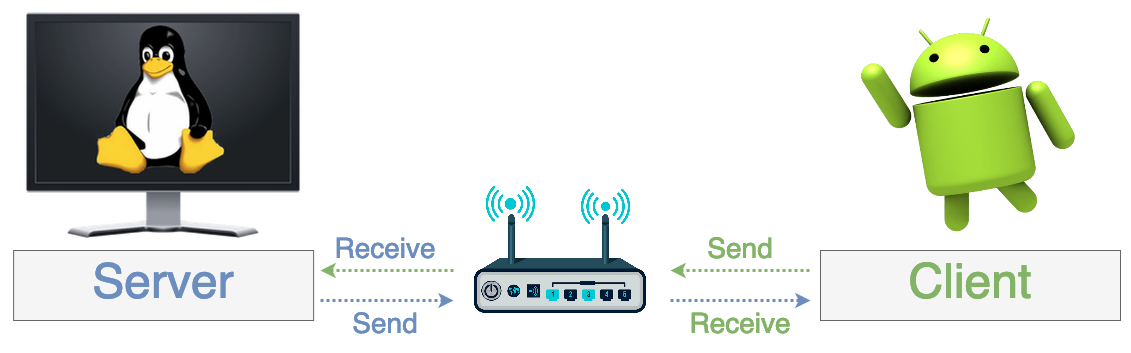

**Remote Procedure Call** is an inter-process communication method. Used for client-server applications. RPC mechanisms are used when a computer program calls the execution of a procedure or subroutine in another address space that is encoded as a regular procedure call. In other words, a call to a method or function is sent to a remote device, executed there, and returned as a response back. At the same time, in the code it looks like a normal function call.

The figure above shows an example of such an interaction between a server in the form of a desktop computer and a client in the form of an android. The client sends a command from the android to the server, where it is executed and the result is returned back to the client.

## How cross compilation and RPC are used in TVM?

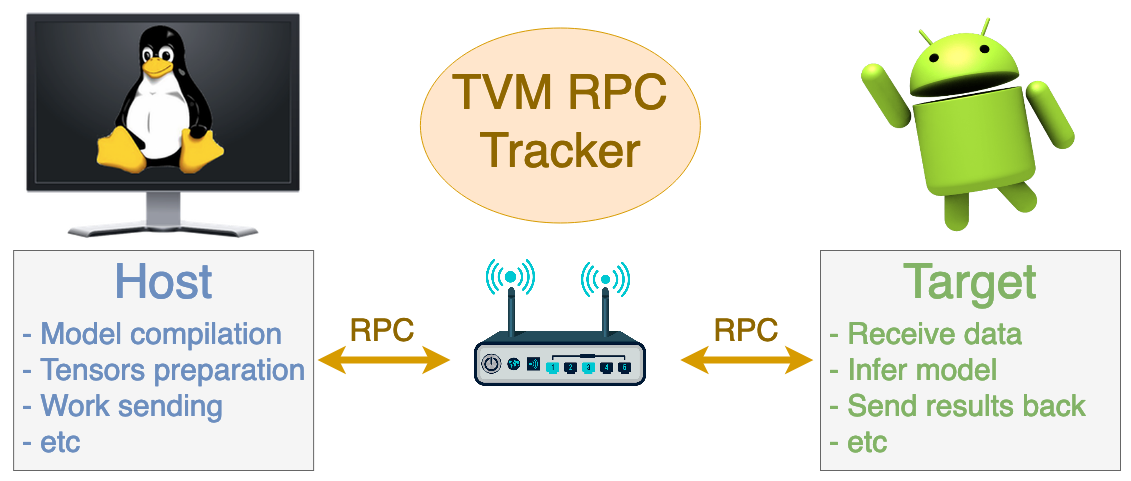

Cross-compilation and RPC technologies are widely used in TVM when there is a need to run the model on any device, for example, an Android smartphone. To run the model on the target device, you must have a library with TVM runtime compiled for this platform and an RPC server. TVM runtime implements the basic TVM functions needed to run the model, such as working with tensors, running operators, getting results, performance measurements, and so on. The RPC server is responsible for the communication, receiving commands from the host and sending responses back.

It is often impossible to compile TVM on the target device due to the lack of compilers on the device or limited hardware resources, so cross-compilation is used for the build. Thus, in the Android device example, the TVM runtime and RPC server are compiled on the host, then they must be uploaded to the phone, and TVM models can be executed there.

Communication between the host and the device takes place using RPC. Usually, TVM RPC tracker is running on the host (but may also be running on some 3rd device). RPC tracker is an application in which RPC servers are registered and communication between the host and the device takes place through it.

The figure above shows the scheme of work. An RPC server running on Android connects to the launched TVM RPC tracker and registers the device. Then the host sends a request to the tracker to get the target device with a specific key. If the device is available, then the host and the target device can start communicating through the TVM RPC Tracker, for example, the host sends a command to run the model, this command is broadcast to the RPC Tracker, which in turn transmits it to the device. The model is executed on the target device and the result is sent back via RPC Tracker to the host.

Let's take a closer look at what needs to be done in order to run something on a remote device using TVM.

## TVM cross compilation

- Get TVM source code from github:
  ```bash
  git clone https://github.com/apache/tvm.git; cd tvm
  ```
- Update all submodules:
  ```bash
  git submodule update --init --recursive
  ```
- Build TVM runtime for target device. Depends on the target device, it might be necessary to specify different compilers:
  - Build for Arduino is described here: https://tvm.apache.org/docs/tutorial/cross_compilation_and_rpc.html
  - RPC for iOS: https://github.com/apache/tvm/tree/main/apps/ios_rpc
  - RPC for Android: https://github.com/apache/tvm/tree/main/apps/android_rpc
  - Native RPC application: https://github.com/apache/tvm/tree/main/apps/cpp_rpc

Above are a number of links that will help you understand how to build TVM for a specific platform.

The TVM documentation gives an example of compiling for various microcontrollers, such as Arduino and Firefly-RK3399.

The GitHub repository also contains a number of useful applications for running RPC on devices. The `ios_rpc` application provides the ability to run an RPC server on Apple devices. The documentation for this application also describes in detail the process of building a TVM runtime for iOS.

To run models using the Android RPC application, there is no need to separately build the TVM runtime, because the TVM runtime is built into the application itself. However, the inconvenience of this approach is that if you need to add any module that was not previously included in the assembly, then you need to add it to the [header file](https://github.com/apache/tvm/blob/main/apps/android_rpc/app/src/main/jni/tvm_runtime.h) and rebuild the app.

The `cpp_rpc` application can be used to run an RPC server on any other device. The instructions on GitHub provide a detailed description of how you can build this application for various devices and with different TVM modules. We will also be using this app to run an RPC server on Android as well. It works more stable than Android RPC.

## Building cpp_rpc for Android

- Pre-requirements:
  - Android NDK: https://developer.android.com/ndk
  - Android Debug Bridge (ADB): https://developer.android.com/studio/command-line/adb
  - Поддержка OpenCL устройством (не обязательно)

- Build `cpp_rpc` and TVM runtime for Android:
  ```bash
  mkdir andorid_build && cd android_build
  cmake -DCMAKE_TOOLCHAIN_FILE=${ANDROID_NDK_HOME}/build/cmake/android.toolchain.cmake -DANDROID_ABI=arm64-v8a -DANDROID_NATIVE_API_LEVEL=android-28 -DANDROID_STL=c++_static -DUSE_CPP_RPC=ON ..
  make -j4 tvm_runtime tvm_rpc
  ```
- For building with OpenCL support: `-DUSE_OPENCL=ON`

To build `cpp_rpc` for Android, you will need an Android NDK installed on the computer to build the application itself and TVM Runtime, as well as a configured `adb` to interact with a smartphone connected to the computer. If you plan to run the model on a GPU, then it is necessary that the device has OpenCL support. However, if OpenCL is not supported by the device, then you can run the model on the CPU.

If all the pre-requirements are met, then you can proceed with the assembly. Create a directory `android_build` and go there. Then we configure the assembly, by specifying the file that configures the toolchain necessary for the assembly. This file is located in the NDK directory. We indicate under which architecture and for which Android API the application should be built. We also statically link the c++ library. The parameter `-DUSE_CPP_RPC=ON` specifies that in addition to `tvm_runtime`, we want to build the `cpp_rpc` application.

If we want to use the GPU, then the `-DUSE_OPENCL=ON` parameter must be passed to the CMake command indicating that we want to build a TVM runtime with OpenCL support.

After assembly configuring, the build can be started.

## Running cpp_rpc on the device

- Connect Android device to computer. Use `adb devices` to check that the device was connected successfully.
- Upload TVM Runtime and `cpp_rpc` to device: `adb push {libtvm_runtime.so,tvm_rpc} /data/local/tmp`
- Check that the application will start: `adb shell "cd /data/local/tmp; LD_LIBRARY_PATH=/data/local/tmp /data/local/tmp/tvm_rpc"`.
- In the console, you will see something like this:

  ```
   server       - Start the server
  --host        - The hostname of the server, Default=0.0.0.0
  --port        - The port of the RPC, Default=9090
  --port-end    - The end search port of the RPC, Default=9099
  --tracker     - The RPC tracker address in host:port format e.g. 10.1.1.2:9190 Default=""
  --key         - The key used to identify the device type in tracker. Default=""
  --custom-addr - Custom IP Address to Report to RPC Tracker. Default=""
  --work-dir    - Custom work directory. Default=""
  --silent      - Whether to run in silent mode. Default=False

    Example
    ./tvm_rpc server --host=0.0.0.0 --port=9000 --port-end=9090  --tracker=127.0.0.1:9190 --key=rasp
  ```


If the application did not print such a message, then something went wrong. If you see a message that `libc++_shared.so` cannot be found on the device, then you need to upload it to the device along with TVM runtime and `cpp_rpc`.

To do this, in the directory with the NDK, we are looking for this library for the architecture of the target device:
```bash
find ${ANDROID_NDK_HOME} -name libc++_shared.so
```

Then upload a found library to the smartphone:
```bash
adb push path/to/libc++_shared.so /data/local/tmp
```

If `tvm_rpc` prints a message that the format of the executable file is incorrect, then this means that you compiled `cpp_rpc` for the wrong architecture. Perhaps you need to change the value of the `-DANDROID_ABI` parameter when building TVM Runtime or use a different toolchain.

## Establish RPC connection

- Run RPC tracker: 
  ```bash
  python3 -m tvm.exec.rpc_tracker --host 0.0.0.0 --port 9190
  ```
- Get RPC tracker state:

In [12]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
-------------------------------



More about establishing RPC connection you can read [here](https://tvm.apache.org/docs/dev/how_to/setup_rpc_system.html).

You need to add TVM Python modules to `PYTHON_PATH`, in order for the `tvm.exec.rpc_tracker` and `tvm.exec.query_rpc_tracker` commands to work. How to do this was described in the section ["Building TVM from source code. Installing TVM module to Python"](#Building-TVM-from-source-code.-Installing-TVM-module-to-Python), or you can install TVM via pip.

Command `tvm.exec.rpc_tracker` runs TVM RPC tracker. The `query_rpc_tracker` command returns a list of devices connected to the tracker. It is empty, because nothing has been connected yet.



- Run `tvm_rpc` on the device:
  ```bash
  adb reverse tcp:9190 tcp:9190
  adb forward tcp:9090 tcp:9090
  adb forward tcp:9091 tcp:9091
  adb forward tcp:9092 tcp:9092
  adb forward tcp:9093 tcp:9093
  adb shell LD_LIBRARY_PATH=/data/local/tmp /data/local/tmp/tvm_rpc server --host=0.0.0.0 --port=9090 --tracker=127.0.0.1:9190 --key=android --port-end=9190
  ```

Specifying `reverse` and `forward` ports can be skipped if the mobile device and the computer are connected to the same local network. `reverse` and `forward` are required for port forwarding via USB cable. Then the requirement that devices be on the same network is no longer necessary. And the phone, for example, may not even be connected to a Wi-Fi network. We specify several `forward` ports, because in case of an unsuccessful shutdown, the device may not release it, but the RPC server will already switch to the next port. In this case, the device may not accept commands from `rpc_tracker`. To avoid this situation, we forward a set of serial ports.

Before running `tvm_rpc`, you need to set `LD_LIBRARY_PATH` variable. This is the path where the dynamic loader will look for libraries for the application. We have a `libtvm_runtime.so` in this directory. Let's describe the parameters that are passed to `tvm_rpc`:
- `server` - specifies that the RPC server should be started on the device.
- `host` - the address of the host on which the server is running. `0.0.0.0` means the server is running locally.
- `port` - port on which the RPC server should be started.
- `tracker` - address and port of the RPC tracker.
- `key` - the name which was used for registering the device in the tracker.
- `port-end` - if it is not possible to start an RPC server on `port`, for example, the port is busy, then `tvm_rpc` will search for a free port by step-by-step increasing the `port` value till the value defined in `port-end`.

After a successful build of `rvm_rpc`, you can start running the model via RPC.

- Check that the device has been registered in the tracker:

In [13]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



## Run model on a remote device through RPC

- Import modules:

In [14]:
from tvm import rpc 
from tvm.contrib import utils, ndk

- Define function for getting target:

In [15]:
def get_target(arch, use_gpu=None):
    all_android_targets = {
        "armeabi-v7a": "llvm -mtriple=armv7a-linux-androideabi",
        "arm64-v8a": "llvm -mtriple=aarch64-linux-android",
        "x86": "llvm -mtriple=i686-linux-android",
        "x86_64": "llvm -mtriple=x86_64-linux-android",
    }
    target = tvm.target.Target(all_android_targets[arch])

    if use_gpu == "GPU":
        target = tvm.target.Target("opencl", host=target)
    elif use_gpu == "ADRENO":
        target = tvm.target.Target("opencl --device=adreno", host=target)
    return target

Usually, it is not necessary to define such function, we did it for convenience. In the dictionary `all_android_targets`, we gave an indication of the correct triplets for each of the architectures. You can find them on the website https://developer.android.com/ndk/guides/other_build_systems#overview.

Also, we select the device where we want to run our model. If `use_gpu = None` then CPU device will be used. If `use_gpu = GPU` then OpenCL device will be used, if we want to use Adreno optimizations then `use_gpu = ADRENO` should be specified.

- Get target which will be used for running the model:

In [16]:
target = get_target("arm64-v8a", "GPU")

First, let's use OpenCL device for executing the model.

- Build our model for target:

In [17]:
with tvm.transform.PassContext(opt_level=3):
    tvm_lib = relay.build(mod, target=target, params=params)

- Connect to the RPC tracker:

In [18]:
rpc_tracker_host = os.environ.get("TVM_TRACKER_HOST", "127.0.0.1")
rpc_tracker_port = int(os.environ.get("TVM_TRACKER_PORT", 9190))

tracker = rpc.connect_tracker(rpc_tracker_host, rpc_tracker_port)

After building the library, we can connect to the tracker in order to request a remote device from it. The address and port of the tracker are taken from the environment variables, if they are not specified, then the default values are used. By default, the address of the local host is `127.0.0.1` and the port is `9190`.

We use [connect_tracker](https://tvm.apache.org/docs/reference/api/python/rpc.html#tvm.rpc.connect_tracker) to connect to the RPC tracker. This function returns a tracker session object. Using this object, it will be possible to get the remote device.

- Define function, which will require connected Android device:

In [19]:
key = "android"

def get_remote(key, target):
    remote = tracker.request(key)
    dev = remote.device(str(target), 0)
    return remote, dev

Here we define a function which will be used for getting remote device. By using [tracker.request](https://tvm.apache.org/docs/reference/api/python/rpc.html#tvm.rpc.TrackerSession.request) we request a remote device from the tracker. After that we get the accelerator on which we will run the model. For GPU we request OpenCL: `remote.cl(0)`, and for CPU we request the CPU: `remote.cpu(0)`.

We pass the key under which the device must be registered in the tracker to the function. We will use the key - `android`.

- Get an object to work with remote device:

In [20]:
remote, dev = get_remote(key, target)

- Check status of remote device in RPC tracker:

In [21]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      0     0      
-------------------------------



The status shows that there is one device with the `android` key, but it is no longer free, as it was before. This means that we captured it for work and will run the model on it. Usually you don't need to check the status of the tracker so often. Here we check in order to demonstrate the state changes depending on the different commands.

- Define functions for exporting library and uploading it to the remote device:

In [22]:
def export_lib(lib, lib_name):
    fcompile = ndk.create_shared # if not Android or iOS then None
    lib.export_library(lib_name, fcompile)

def upload_lib(file_name, file_path = "."):
    remote.upload(file_path + "/" + file_name)
    rlib = remote.load_module(file_name)
    return rlib

The `export_lib` function exports the TVM library to a file, which can then be uploaded to the device and executed there. To do this, you need to specify `fcompile` - this is the function that will be used to compile the model in the [export_library](https://tvm.apache.org/docs/reference/api/python/runtime.html#tvm.runtime.Module.export_library). For Android, use the [ndk.create_shared](https://tvm.apache.org/docs/reference/api/python/contrib.html#tvm.contrib.ndk.create_shared) function. In case of building for iOS [xcode.create_dylib](https://tvm.apache.org/docs/reference/api/python/contrib.html#tvm.contrib.xcode.create_dylib). The default value is `None`.

In the `upload_lib` function, we call the [upload](https://tvm.apache.org/docs/reference/api/python/rpc.html#tvm.rpc.RPCSession.upload) method, which uploads the library to the device. And then we call the [load_module](https://tvm.apache.org/docs/reference/api/python/rpc.html#tvm.rpc.RPCSession.load_module) method to get the remote module to work with it.

- Export library and upload it to the target device:

In [23]:
model_name = "mobilenet_android"
lib_name = f"{model_name}.opencl.so"
export_lib(tvm_lib, lib_name)
rlib = upload_lib(lib_name)

Specify the name of the library in which the model should be saved and load it to the device.

- Evaluate performance of the model on Android with OpenCL:

In [24]:
module, tvm_output = evaluate_performance(rlib, dev, img_data, input_name)

Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
  76.3426      76.4170      77.0093      75.6015       0.5771                  


Here we see pretty bad performance of the model. It is happened because default scheduling was used. Later we will try to improve the performance of the model by tuning it for target device.

- Check accuracy of the model:

In [25]:
check_output(tvm_output)

class='n02123159 tiger cat' with probability=0.456479
class='n02123045 tabby, tabby cat' with probability=0.452543
class='n02124075 Egyptian cat' with probability=0.049952
class='n02127052 lynx, catamount' with probability=0.033805
class='n02123394 Persian cat' with probability=0.001530


The model works on a remote device with the same accuracy as it was in the previous run on local CPU.

- Release objects related to the remote device. After this device should be displayed as a free in tracker:

In [26]:
del module, rlib, dev, remote

Usually, when running scripts, there is no need to delete all objects that were associated with the remote device, because at the end of the script, all objects are automatically deleted, and the device is released. Due to the fact that we are working in Jupyter and in the next step we want to start tuning on a remote device, we need to release it after that the tuner can take the device and run measurements on it. Therefore, we delete all variables that point to the remote device manually.

- Check device state in tracker:

In [27]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



Now we can see that the device has status `free` in the tracker.

# Model tuning

## What is model tuning in terms of TVM?

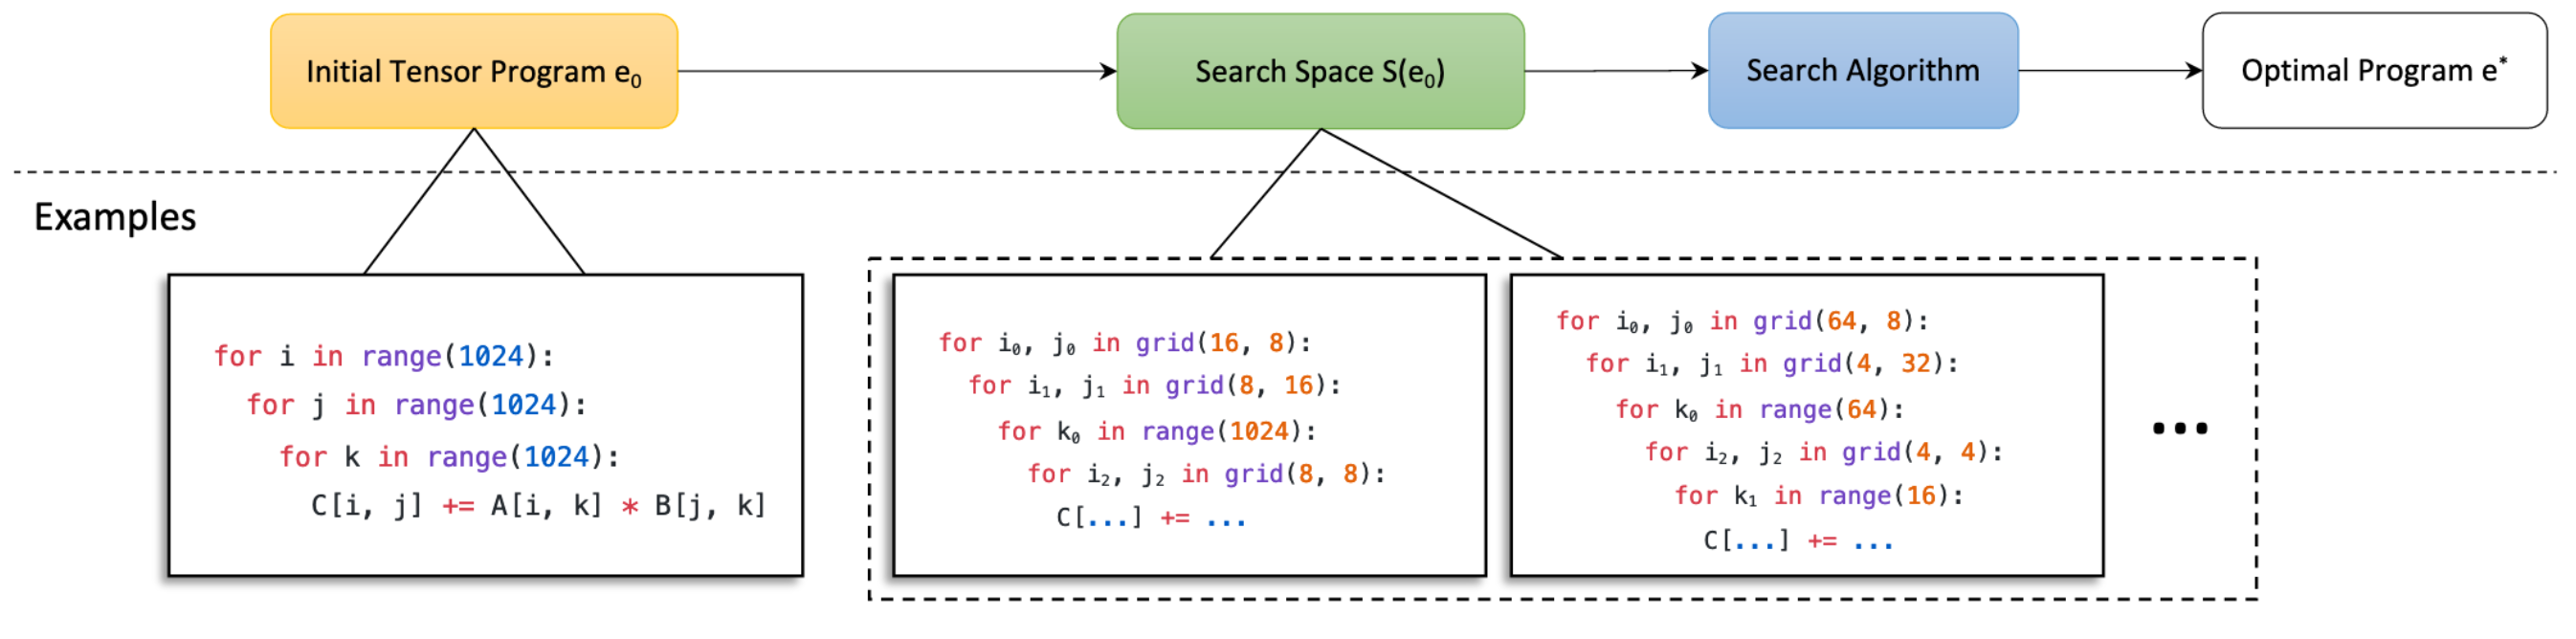

Consider what model tuning is from the point of TVMs view. When we run model in TVM, the initial version of the program can be quite simple in terms of code. The figure above on the left side just shows an example of such a program. There is implemented the function of multiplying matrices with a size of `1024x1024` elements. When we start tuning in TVM, it starts iterating over the configurations from the search space, measuring the network execution time and leaving the best options. In the middle of the figure, there are two variants of the code that can be generated during the search. The search algorithm goes through various code variants, as well as various parameters for splitting calculations into cycles, and finds the optimal implementation of the algorithm for the target device.

## Tuning algorithms in TVM

- AutoTVM: https://arxiv.org/pdf/1805.08166.pdf
- Auto-Scheduler: https://arxiv.org/pdf/2006.06762.pdf
- Meta-Scheduler: https://arxiv.org/pdf/2205.13603.pdf

TVM has three tuning algorithms: AutoTVM, Auto-Scheduler and Meta-Scheduler. AutoTVM is the first generation of tuning algorithms in TVM. Auto-Scheduler is the second and more modern generation. The latest generation is the Meta-Scheduler. Meta-Scheduler is still under active development, so many new improvements and features are being added to this scheduling algorithm. In this presentation, we won't consider Auto-Scheduler and Meta-Scheduler. If you need to knew more about them, please, use [official TVM documentation](https://tvm.apache.org/docs/). Let's take a look how AutoTVM works.

## AutoTVM overview

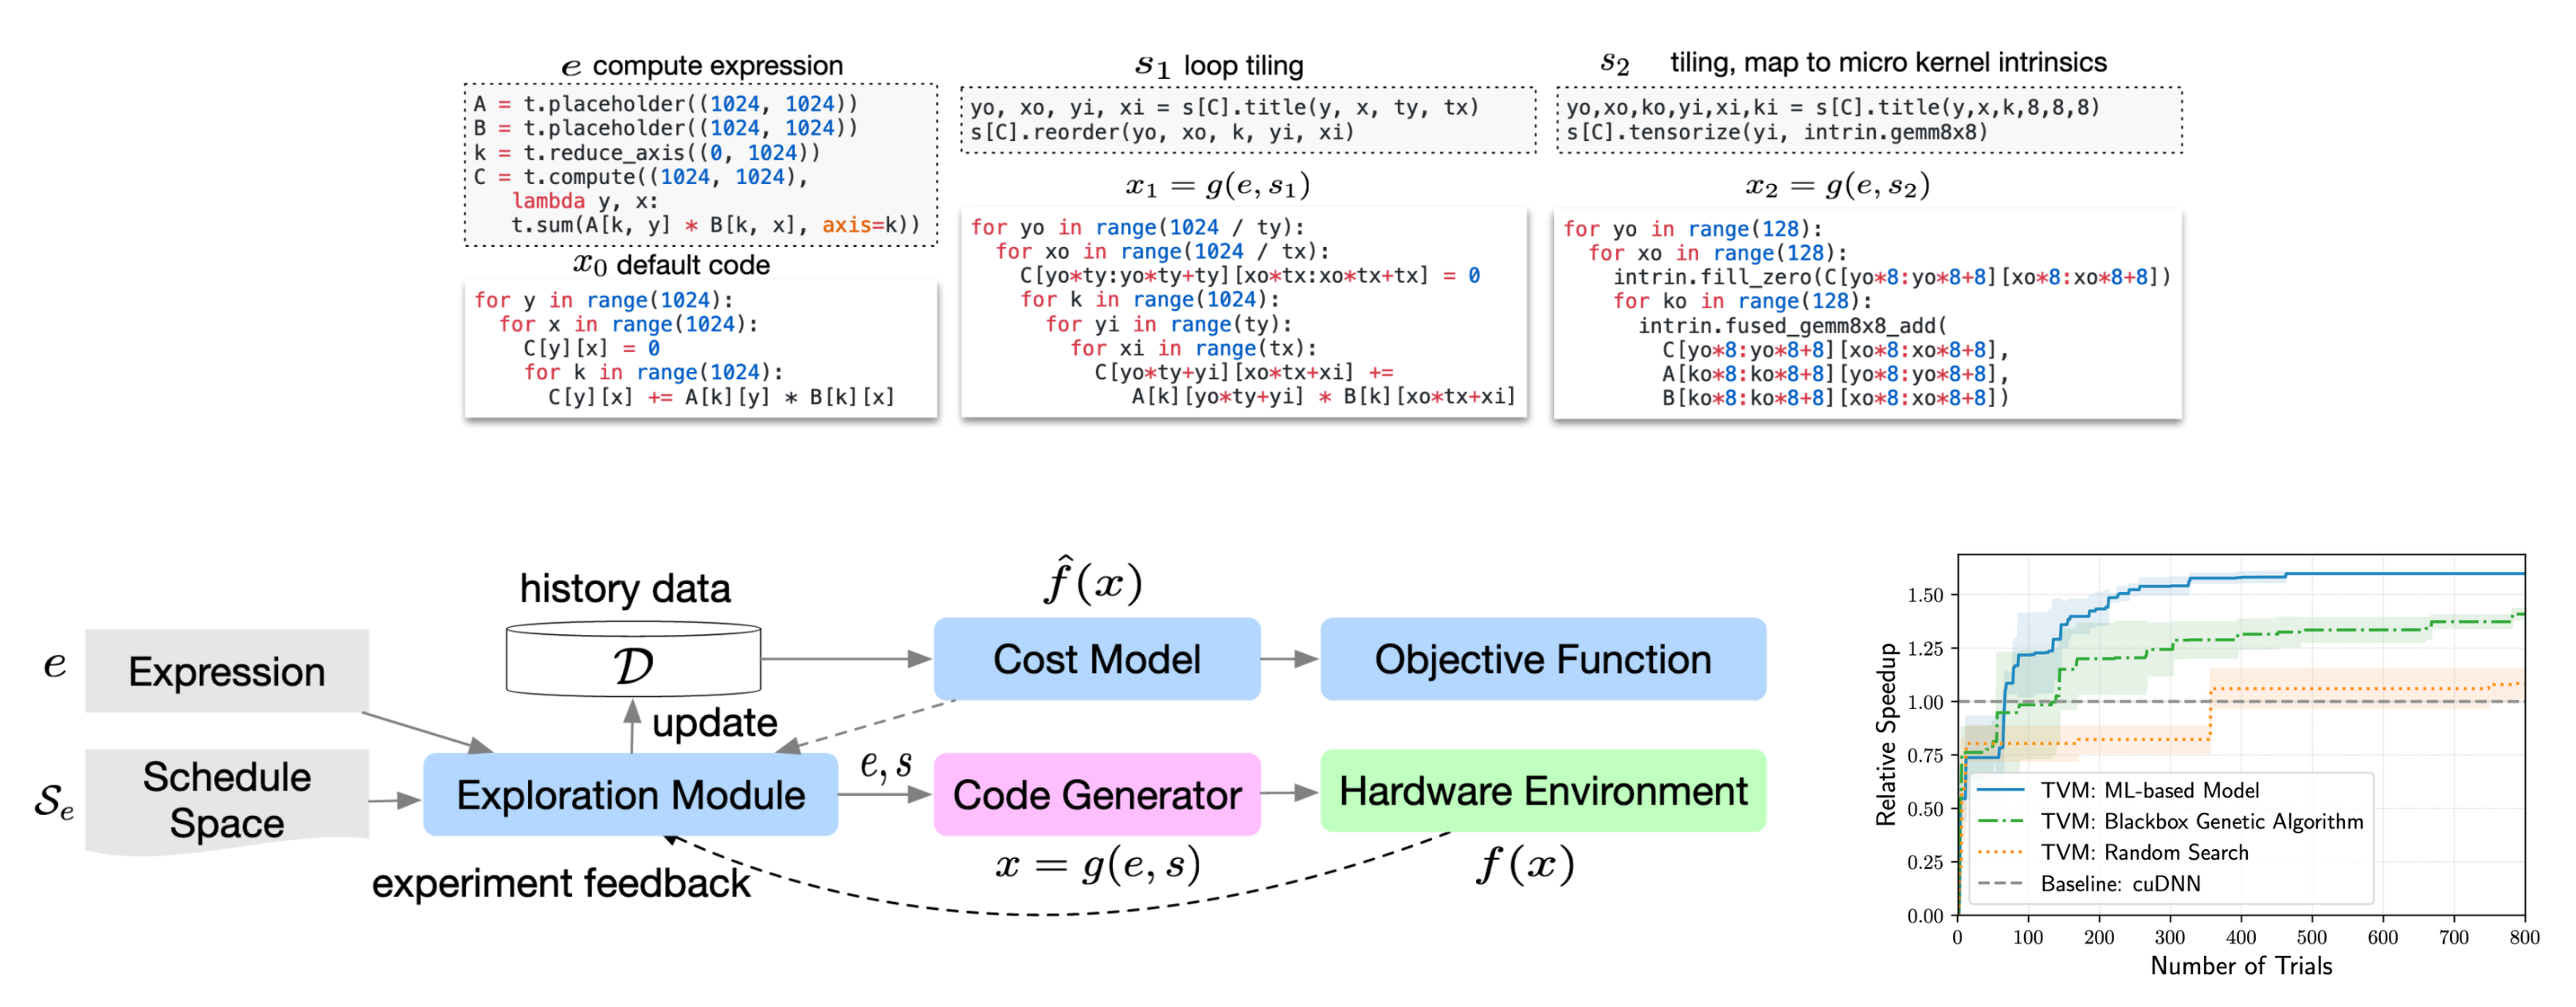

AutoTVM works with subgraphs, not just an operator, so the search space might be quite extensive and complex.

AutoTVM is a pattern-based search algorithm to find an efficient implementation of tensor operations. At the top of the image, on the left, is the code for the compute function that calculates the product of matrices. The images on the right show an example of writing a scheduling function for this compute function. Writing a scheduling function can be a very complex task and require the developer to have knowledge of the target device's architecture.

The bottom left shows the AutoTVM algorithm. The input is an expression and a search space. AutoTVM iterates through various prune configurations to run on the target device. Runtime statistics are collected in database `D`. This base is used to update the statistical cost model. Based on the cost model, each low-level program is evaluated. AutoTVM measures the actual time for each implementation, which provides reliable training data for the cost model to predict how long the next implementation will work. The advantage of this approach is that since the model is trained using run-time data, it can adapt to whatever type of hardware it runs on. The downside is that it takes longer for the cost model to start to improve.

In the graph on the right side of the image, you can see the speedup achieved with TVM compared to cuDNN for ResNet-50 on NVidia Titan X. To outperform cuDNN, TVM based on ML search algorithm needs about 70 trials.

## Tuning with AutoTVM

- Import required modules:

In [28]:
from tvm import autotvm

In [29]:
from tvm.autotvm.tuner import XGBTuner, GATuner, RandomTuner, GridSearchTuner

Let's try to use AutoTVM. Import the necessary Python modules. The `autotvm` module contains various functions that are used to start tuning the model using AutoTVM. Moules `XGBTuner`, `GATuner`, `RandomTuner` and `GridSearchTuner` are responsible for the search algorithm in the optimization space. You can read more about it [here](https://tvm.apache.org/docs/reference/api/python/autotvm.html#module-tvm.autotvm.tuner).

- Specify the name of the log file with tuning statistic:

In [30]:
log_file = f"./{model_name}.opencl.autotvm.log"

In the variable `log_file` we will store the name of the file into which the tuning result will be written. It will be used during compilation to get an optimized model.

- Define a function that should be responsible for extracting tasks from the model:

In [31]:
# extract workloads from relay program
def extract_tasks(mod, target, params):
    print("Extract tasks...")
    tasks = autotvm.task.extract_from_program(
        mod, target=target, params=params
    )
    assert(len(tasks) > 0)
    for idx, task in enumerate(tasks):
        print("Task: %d,  workload: %s" % (idx, task.workload))
    return tasks

Tasks are extracted using the `autotvm.task.extract_from_program` function defined [here](https://github.com/apache/tvm/blob/main/python/tvm/autotvm/task/relay_integration.py). This function analyzes the Relay graph, extracts subgraphs from it into which the graph will be divided during execution, and looks for the optimal configurations for these subgraphs.

- Extract tasks:

In [32]:
tasks = extract_tasks(mod, target, params)

Extract tasks...
Task: 0,  workload: ('conv2d_nchw.cuda', ('TENSOR', (1, 3, 224, 224), 'float32'), ('TENSOR', (32, 3, 3, 3), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'float32')
Task: 1,  workload: ('depthwise_conv2d_nchw.cuda', ('TENSOR', (1, 32, 112, 112), 'float32'), ('TENSOR', (32, 1, 3, 3), 'float32'), (1, 1), (1, 1, 1, 1), (1, 1), 'float32')
Task: 2,  workload: ('conv2d_nchw.cuda', ('TENSOR', (1, 32, 112, 112), 'float32'), ('TENSOR', (16, 32, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'float32')
Task: 3,  workload: ('conv2d_nchw.cuda', ('TENSOR', (1, 16, 112, 112), 'float32'), ('TENSOR', (96, 16, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'float32')
Task: 4,  workload: ('depthwise_conv2d_nchw.cuda', ('TENSOR', (1, 96, 112, 112), 'float32'), ('TENSOR', (96, 1, 3, 3), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'float32')
Task: 5,  workload: ('conv2d_nchw.cuda', ('TENSOR', (1, 96, 56, 56), 'float32'), ('TENSOR', (24, 96, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'f

- Define a function that will run the model tuning:

In [33]:
def run_tuning(
    tasks, measure_option, tuner="gridsearch", early_stopping=None, log_filename="tuning.log", n_trial=333
):
    for i, task in enumerate(tasks):
        prefix = "[Task %2d/%2d] " % (i + 1, len(tasks))

        # create tuner
        if tuner == "xgb" or tuner == "xgb-rank":
            tuner_obj = XGBTuner(task, loss_type="rank")
        elif tuner == "ga":
            tuner_obj = GATuner(task, pop_size=50)
        elif tuner == "random":
            tuner_obj = RandomTuner(task)
        elif tuner == "gridsearch":
            tuner_obj = GridSearchTuner(task)
        else:
            raise ValueError("Invalid tuner: " + tuner)

        # do tuning
        tuner_obj.tune(
            n_trial=n_trial,
            early_stopping=early_stopping,
            measure_option=measure_option,
            callbacks=[
                autotvm.callback.progress_bar(n_trial, prefix=prefix),
                autotvm.callback.log_to_file(log_filename),
            ],
        )

AutoTVM allows you to choose between several different tuners. You can read more about each of them on the [documentation page](https://tvm.apache.org/docs/reference/api/python/autotvm.html?highlight=xgbtuner#module-tvm.autotvm.tuner). By default, we set the value of `n_trial = 333`. This value determines the maximum number of configurations that will be tried for each of the tasks. This value might be reasonable to achieve good performance in adequate time frame.

Then the `tune` function is called, which starts the tuning. The `n_trial` described above is passed there, the `early_stopping` variable, which is responsible for stopping tuning if it is no longer possible to find optimal configurations. Measurement options `measure_option` controls how the generated code is measured. `callbacks` are passed functions responsible for writing configurations to the log file and for displaying the tuning status line. You can read more [here](https://tvm.apache.org/docs/reference/api/python/autotvm.html?highlight=xgbtuner#tvm.autotvm.tuner.Tuner.tune).

- Define the settings for building the model and running it:

In [34]:
measure_option = autotvm.measure_option(
    builder=autotvm.LocalBuilder(build_func=ndk.create_shared, timeout=15),
    runner=autotvm.RPCRunner(key, rpc_tracker_host, rpc_tracker_port, repeat=10, timeout=15),
)

`measure_option` determines how the generated code will be built and run. For example, for a host (a machine on which tuning is running) or for a remote device connected to TVM via RPC. Documentation on `measure_option` is available [here](https://tvm.apache.org/docs/reference/api/python/autotvm.html?highlight=xgbtuner#tvm.autotvm.measure.measure_option). We create a [LocalBuilder](https://tvm.apache.org/docs/reference/api/python/autotvm.html#tvm.autotvm.measure.measure_methods.LocalBuilder) which runs compilation on the local machine but with compiler for Android, and [RPCRunner](https://tvm.apache.org/docs/reference/api/python/autotvm.html#tvm.autotvm.measure.measure_methods.RPCRunner) which runs the generated code on the remote device. In `RPCRunner` we also pass options on which device we want to measure performance and how many times one task should be run during performance measurements.

- Run tuning:

In [ ]:
# run tuning tasks
run_tuning(tasks, measure_option, tuner="xgb", log_filename=log_file)

After starting the model tuning, you need to wait a while. Tuning progress is displayed in the console. The achieved performance in `GFlops` is displayed, as well as how many configurations have already been run and how many remain. When the model tuning is completed, the `log_file` will contain descriptions of the configurations that were run during tuning, and the time they were running. Thus, when this log file is specified when compiling the model, TVM will find and apply the best configurations.

- Compile the model with tuning statistic:

In [35]:
with autotvm.apply_history_best(log_file):
    with tvm.transform.PassContext(opt_level=3):
        tvm_lib = relay.build(mod, target=target, params=params)

The use of [autotvm.apply_history_best](https://tvm.apache.org/docs/reference/api/python/autotvm.html#tvm.autotvm.apply_history_best) indicates that the build should use a file with statistics that were collected for the model during tuning with AutoTVM. Thus, a model with an optimal configuration will be built.

- Check device state in tracker:

In [36]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



- Get an object to work with remote device:

In [37]:
remote, dev = get_remote(key, target)

- Check status of remote device in RPC tracker:

In [38]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      0     0      
-------------------------------



- Export library and upload it to the target device:

In [39]:
lib_name = f"{model_name}.opencl.tuned.so"
export_lib(tvm_lib, lib_name)
rlib = upload_lib(lib_name)

Specify the name of the library in which the model will be saved and load it to the device.

- Evaluate performance of the tuned model on Android with OpenCL:

In [40]:
module, tvm_output = evaluate_performance(rlib, dev, img_data, input_name)

Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
  11.3924      11.3936      11.3936      11.3899       0.0018                  


Here we can see that the performance after tuning was significantly improved (more than 6 times). Next, we will take a look which performance can be achieved after applying Adreno optimizations.

- Check accuracy of the model:

In [41]:
check_output(tvm_output)

class='n02123159 tiger cat' with probability=0.456479
class='n02123045 tabby, tabby cat' with probability=0.452543
class='n02124075 Egyptian cat' with probability=0.049952
class='n02127052 lynx, catamount' with probability=0.033805
class='n02123394 Persian cat' with probability=0.001530


The accuracy of the model after tuning is still the same.

- Release objects related to the remote device. After this device should be displayed as a free in tracker:

In [42]:
del module, rlib, dev, remote

- Check device state in tracker:

In [43]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



# Adreno optimizations

## What and why Textures?

- Memory type representing image with dedicated API for different programming frameworks (OpenCL)
    - Always blocked - 4 elements of channels (originally for RGBA)
    - 2d or 3d images (H/W or H/W/D) in opposite to 1d flatten Buffer access
    - Has limitations for H/W/D parameter - important for mapping of 4d tensors

What are the textures? Textures represents a data type that is intended to store 2D matrices or images. `image2d_t` data type is used for textures in OpenCL. It has several peculiarities: 
- We can read and write to textures only by 4 elements (originally it was implemented for RGBA format). It is possible to get a value of a single element, but anyway you have to read before that 4 elements. So, it might be ineffective.
- You should use at least 2 (in case of 3d image, 3) coordinates to get access to the element in the image.
- Sometimes it might be quite tricky to pack tensor to the texture format, because it is necessary to use 4d tensors and map it to the texture. Texture might have some limitation on the maximum size of its dimensions.

- Qualcomm Adreno™ GPU has architecture benefiting textures
    - SPs load data from texture processor/L1 module for read-only image objects.
    - SPs load and store data through L2 cache for buffer objects and image objects defined with the __read_write qualifier

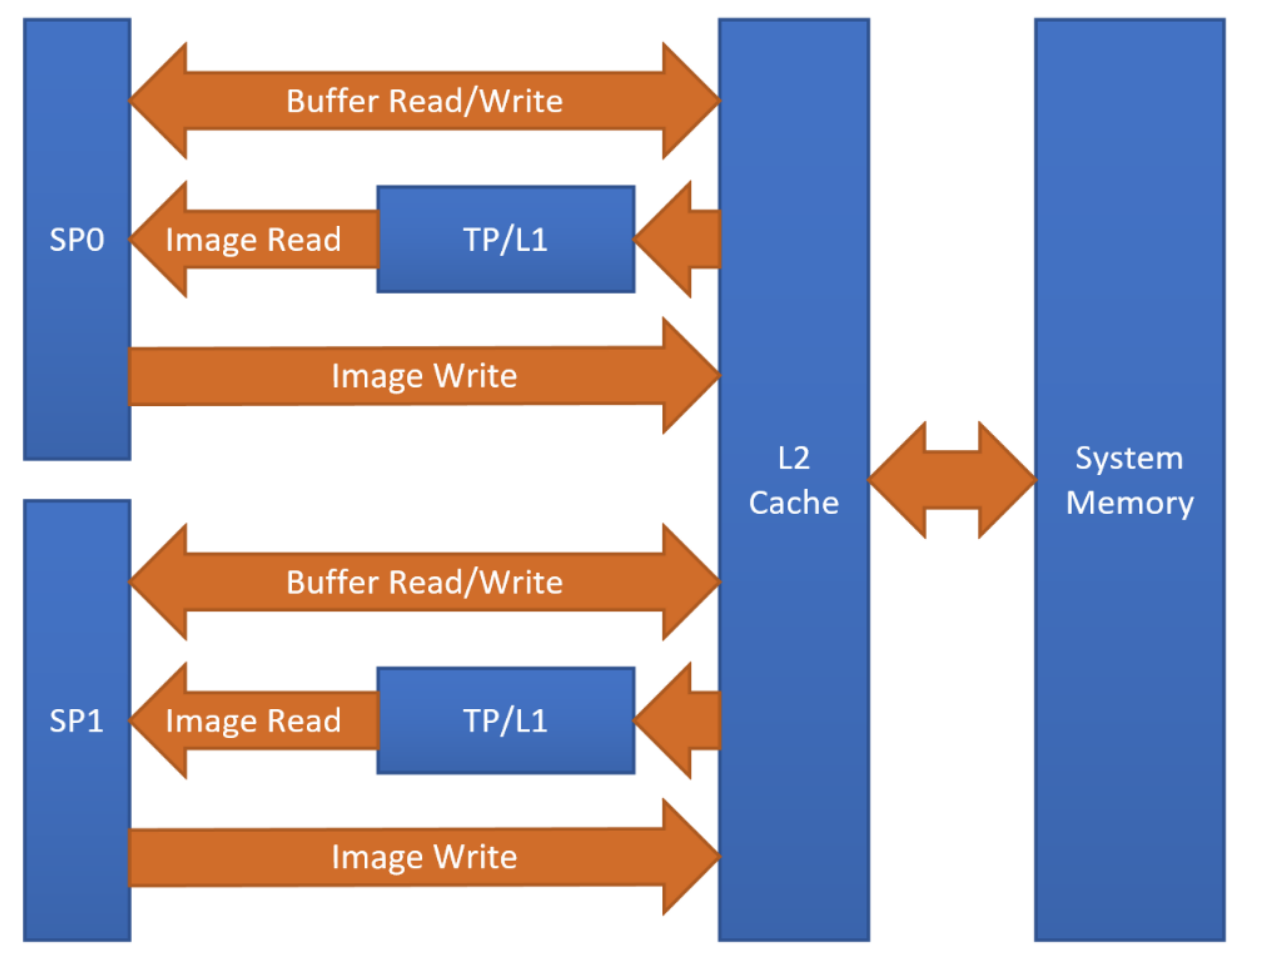

Why we have to use textures? Qualcom Adreno™ GPU gives us several architecture benefits of using textures. On the picture above, you can see a high-level scheme of Adreno architecture. As you can see, L1 cache is used only by Texture Processor (TP). So, in case if we have some compute bound kernel/primitive, which reuse a data, then it is better to put this data to texture and L1 cache will reduce the latency. More about architecture specialties of Adreno GPU you can read in [official programming guide from Qualcomm](https://developer.qualcomm.com/download/adrenosdk/adreno-opencl-programming-guide.pdf).

## Which TVM components should be extended/modified to enable texture support?

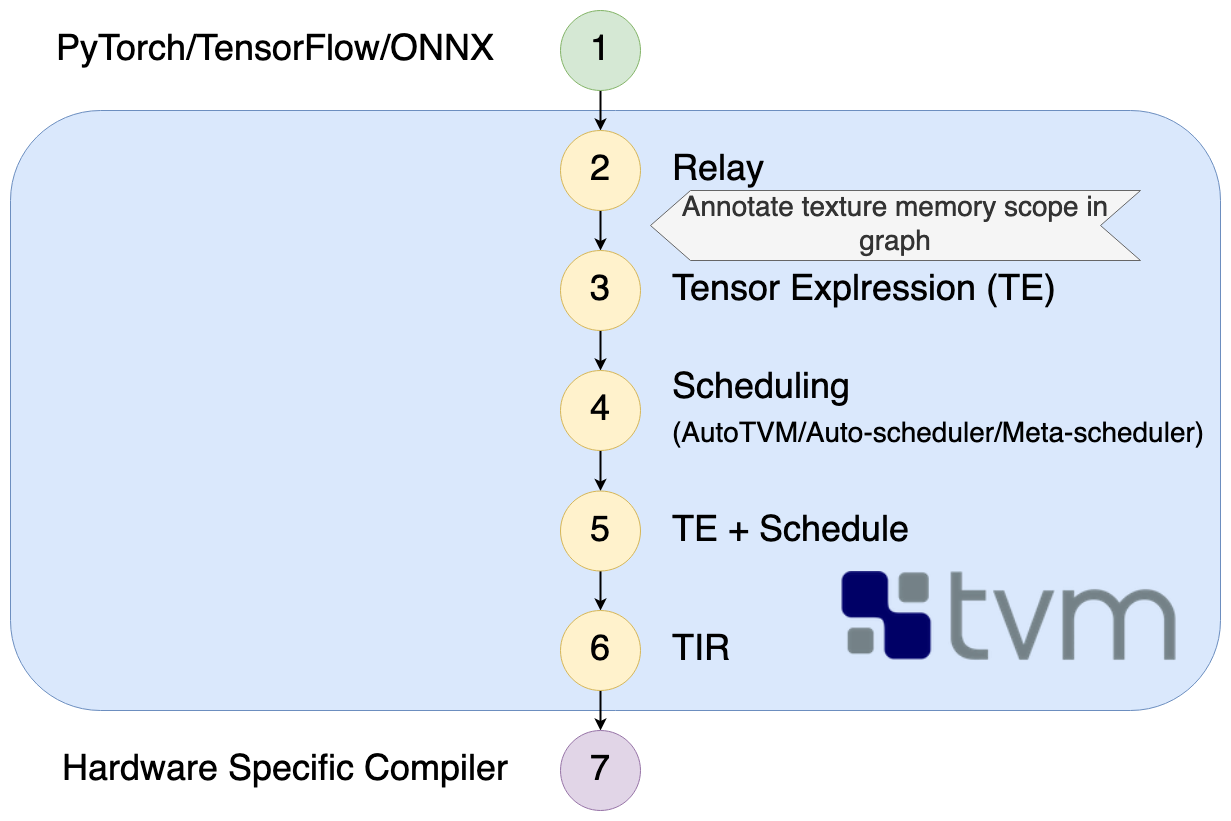

Here, we will consider which components of TVM should be modified to enable texture memory type in it. Here you can see the scheme from the [section](#TVM-workflow) with TVM workflow. And on this scheme we will demonstrate all changes which were made.

First, we need to annotate texture memory scope in dataflow graph. After the model has been transformed to relay, we get a representation of our network as a dataflow graph and this graph contains some information about input/output tensors, primitives etc. We need to extend this graph representation by introducing memory scope for all tensors.

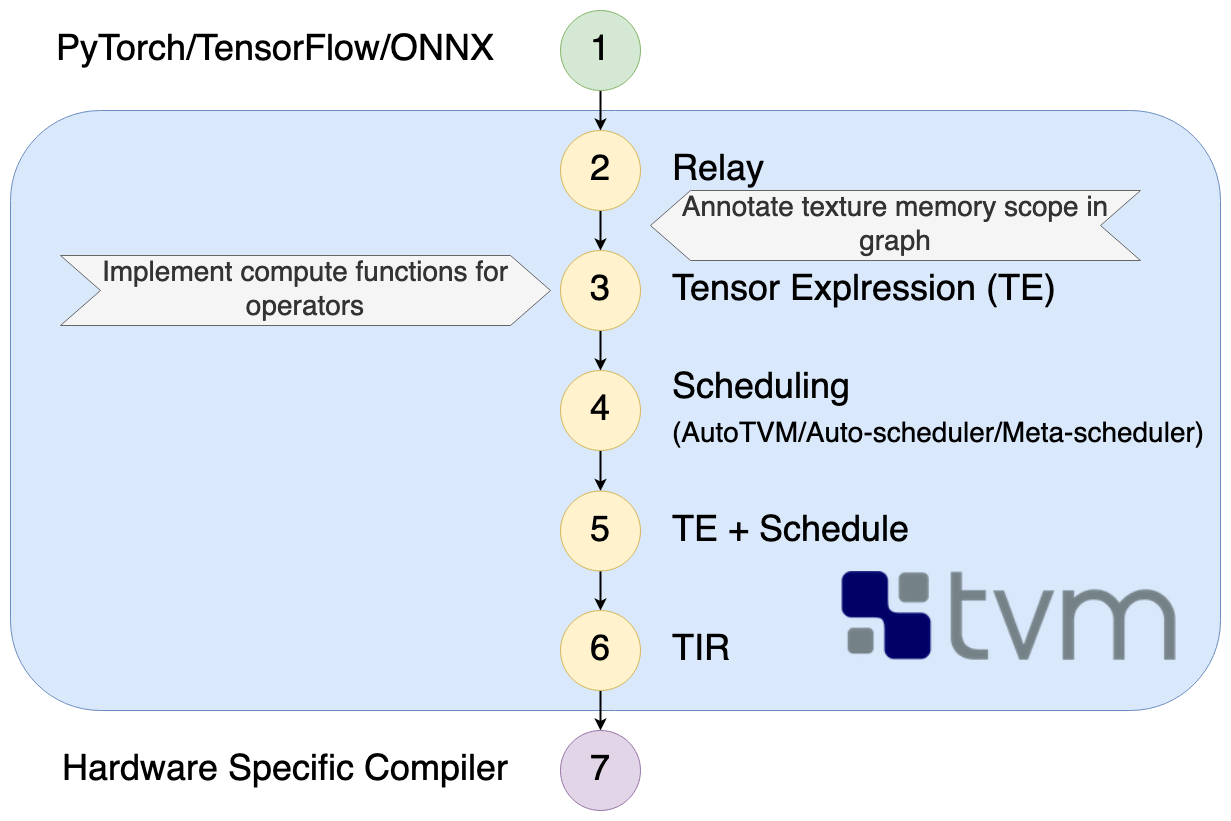

Next, we have to implement compute functions for operators. Textures can work only with block layout format, so we should implement compute functions which will respect to such specialities of textures. In cases when the input tensor cannot be packed to block format, we can extend it and repack in runtime or during a compilation time. After that, it will be possible to use all benefits of textures and boost performance.

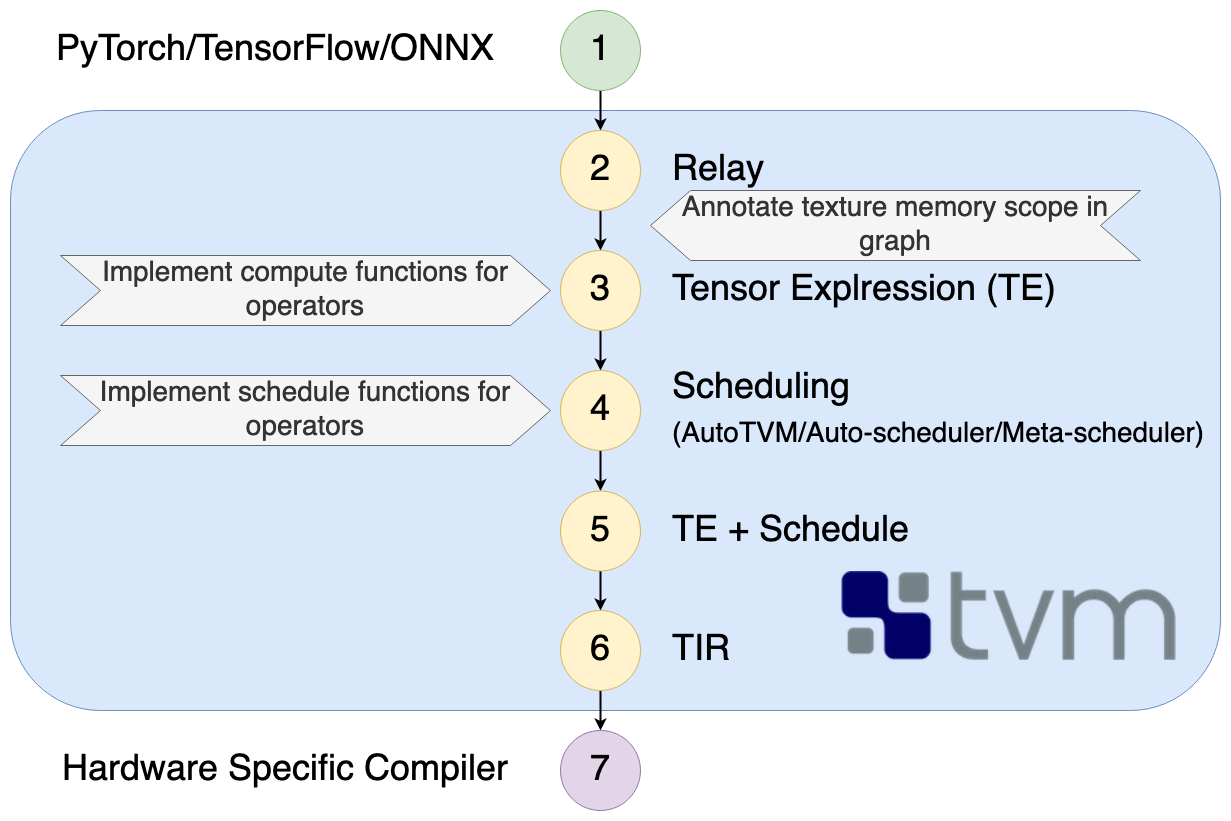

After implementing compute functions, it is necessary to write schedules for the textures. Schedule functions describe the rules how the generated code for the operator should be implemented and how it can utilize as much as possible hardware resources. For example, it describes how we iterate through axes in the tensor, the order of the loops and how they should be split. Using vector instructions can also be specified in schedule function.

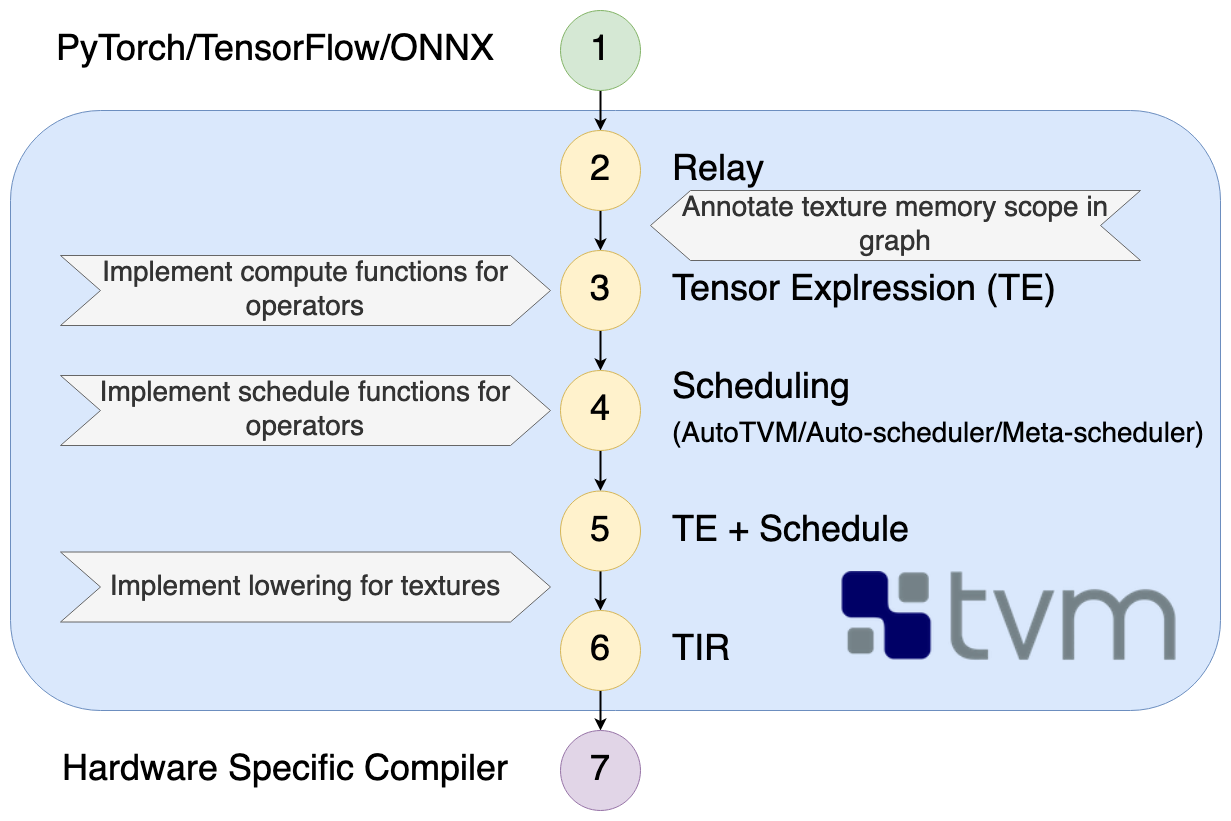

After schedule was applied to the TE, we have to implement functions for lowering this representation to the TIR. We have to implement the function which will provide correct access to the texture elements in the generated program, also we need to specify how texture-specific code will be presented in TIR, we have to introduce new intrinsics for functions of loading and storing textures.

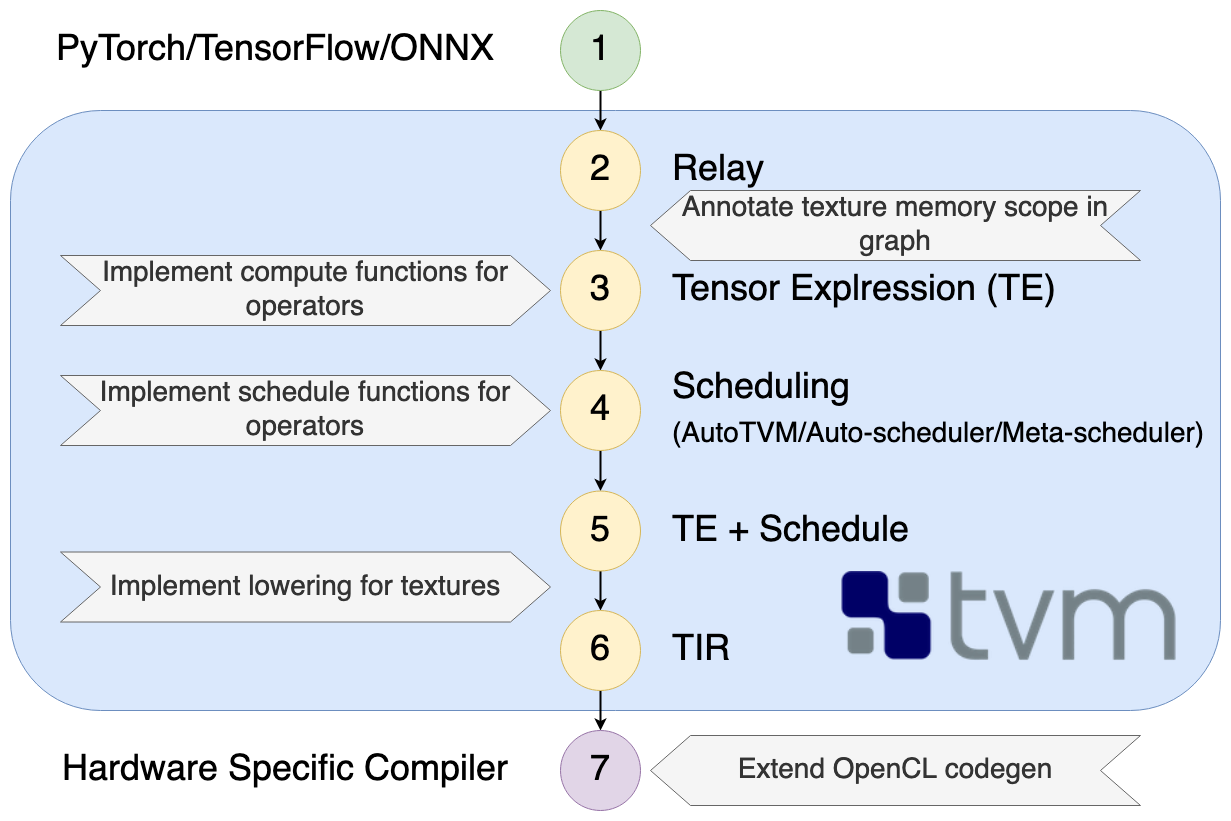

Finally, we have to generate an OpenCL code for its TIR representation. We need to extend OpenCL codegen to support new operations. For example, for writing/reading textures, we have to generate new OpenCL built-in functions: `write_imagef/read_imagef`. Also, we need to generate `image2d_t` data type in the kernels for all textures in them.

## Texture optimizations

- Enabled pass to pack tensors to texture format (spatial + RGBA), including efficient handling of cases when number of channels is not divisible by 4, also enabled special dimension expansion to be divisible by 4 – these stages lead to more work, meanwhile increase level of parallelism / EU utilization and brings better performance 

- Forbidding pad fusing into conv kernel to avoid conditions inside compute intensive kernels  

- Handling multiple scenarios for input data (buffer-as-an-input and texture as an-input) in texture-enabled schedules to maximize use of texture-enabled kernels 

- Enabling Winograd kernel for conv2d (works well for buffers too, texture supports brought additional speedup) 

- Adding multi dimensional filtering semantic for Auto TVM tuner to shape search space by expressing complex HW limitations

- Textures were enabled for Virtual Machine and that allows the user to execute models with dynamic shapes in TVM and use all benefits of textures.

***More about texture enabling in TVM on TVMCon2023: https://youtu.be/77WkFZY9ukY***


Above, you can see a number of texture optimizations which were introduced in TVM. It is not a full list but a small part of it. To learn more about other technical aspects of textures enabling, you can see the video on the YouTube from TVMCon2023. On this conference, my colleague Andrey Malyshev presented our work related to the textures enabling in TVM and described many technical aspects of this task.

Also, in the August 2023, textures were enabled for VirtualMachine, and it made possible to run models with dynamic shapes and exploit all texture benefits.

## Performance results

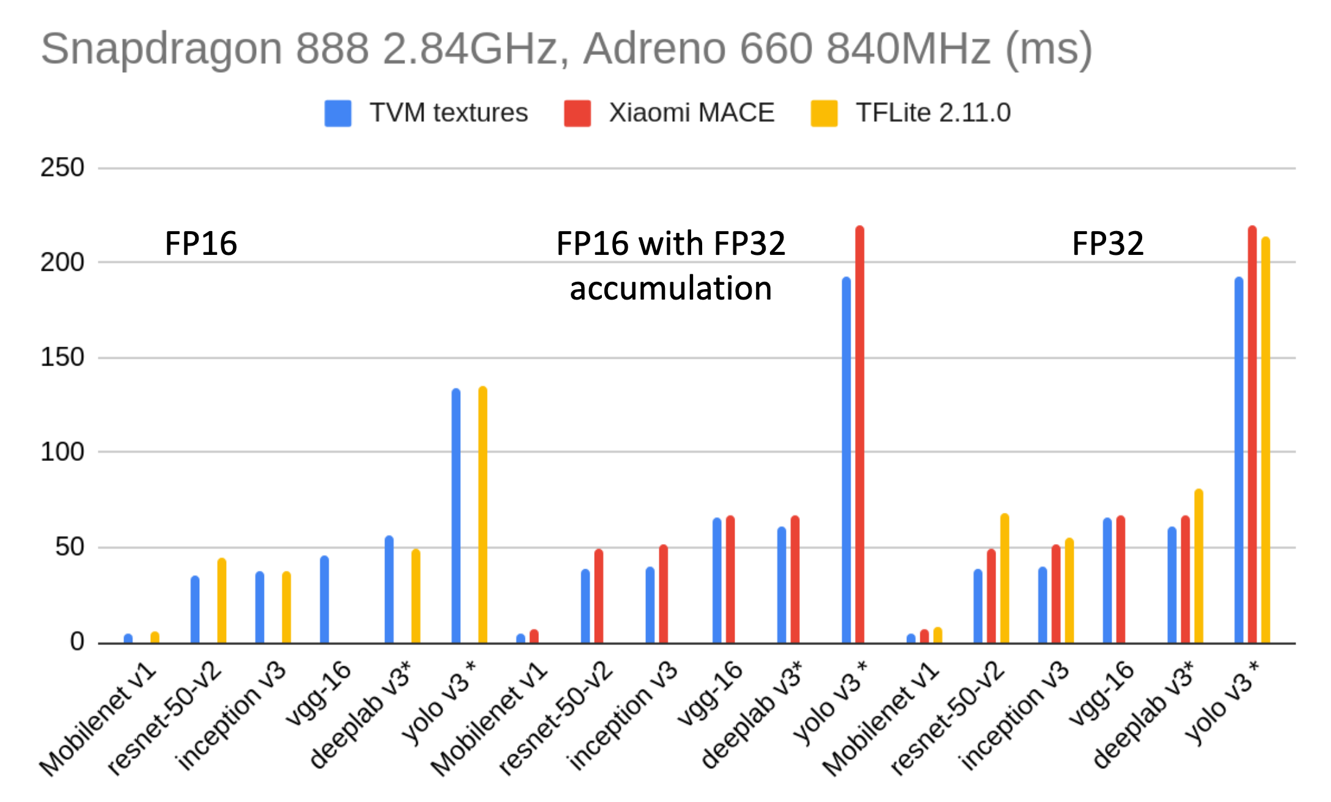

On the picture above, you can see the performance results which were achieved after textures enabling in TVM. We measured performance of five models in three different precision and in comparison with Xiaomi MACE and TFLite inference engines. The numbers on this picture demonstrates execution time of the model, so the lowest column correspondent to the better performance.

For FP16 precision, we compare TFLite vs TVM, because MACE doesn't support inference in FP16 precision. For mixed precision, we compared TVM vs MACE, because TFLite doesn't support mixed precision. And in FP 32 we have graphics for all three inference engines. 

As you can see from the numbers, TVM demonstrates pretty good performance and in almost all cases TVM shows better performance.

## Run model on Adreno GPU

- Configure target for Adreno GPU:

In [44]:
target = get_target("arm64-v8a", "ADRENO")

- Build library with the model:

In [45]:
with tvm.transform.PassContext(opt_level=3):
    tvm_lib = relay.build(mod, target=target, params=params)

- Get an object to work with remote device:

In [46]:
remote, dev = get_remote(key, target)

- Check device state in RPC tracker:

In [47]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      0     0      
-------------------------------



- Export library and upload it to the remote device:

In [48]:
lib_name = f"{model_name}.opencl_adreno.so"
export_lib(tvm_lib, lib_name)
rlib = upload_lib(lib_name)

- Evaluate model performance on Adreno GPU:

In [49]:
module, tvm_output = evaluate_performance(rlib, dev, img_data, input_name)

Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   8.7759       8.7744       8.7790       8.7743       0.0022                  


Time of the default schedule for Adreno already shows not bad performance. Let's try to tune the model for Adreno.

- Check the accuracy of the model:

In [50]:
check_output(tvm_output)

class='n02123159 tiger cat' with probability=0.456479
class='n02123045 tabby, tabby cat' with probability=0.452543
class='n02124075 Egyptian cat' with probability=0.049952
class='n02127052 lynx, catamount' with probability=0.033805
class='n02123394 Persian cat' with probability=0.001530


The accuracy of the model with default Adreno schedule is the same as it was in previous runs.

In [51]:
del module, rlib, dev, remote

- Check device state in tracker:

In [52]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



# Run tuning for Adreno GPU

- Specify the name of the log file with tuning statistic:

In [53]:
log_file = f"./{model_name}.opencl_adreno.autotvm.log"

- Extract tasks:

In [54]:
tasks = extract_tasks(mod, target, params)

Extract tasks...
Task: 0,  workload: ('conv2d_nchwc.image2d', ('TENSOR', (1, 3, 224, 224), 'float32'), ('TENSOR', (32, 3, 3, 3), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'float32')
Task: 1,  workload: ('depthwise_conv2d_nchwc.image2d', ('TENSOR', (1, 32, 112, 112), 'float32'), ('TENSOR', (32, 1, 3, 3), 'float32'), (1, 1), (1, 1, 1, 1), (1, 1), 'float32')
Task: 2,  workload: ('conv2d_nchwc.image2d', ('TENSOR', (1, 32, 112, 112), 'float32'), ('TENSOR', (16, 32, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'float32')
Task: 3,  workload: ('conv2d_nchwc.image2d', ('TENSOR', (1, 16, 112, 112), 'float32'), ('TENSOR', (96, 16, 1, 1), 'float32'), (1, 1), (0, 0, 0, 0), (1, 1), 'float32')
Task: 4,  workload: ('depthwise_conv2d_nchwc.image2d', ('TENSOR', (1, 96, 112, 112), 'float32'), ('TENSOR', (96, 1, 3, 3), 'float32'), (2, 2), (1, 1, 1, 1), (1, 1), 'float32')
Task: 5,  workload: ('conv2d_nchwc.image2d', ('TENSOR', (1, 96, 56, 56), 'float32'), ('TENSOR', (24, 96, 1, 1), 'float32'), (1, 1), 

Here, the number of extracted tasks is the same as it was for OpenCL target. But sometimes the number of tasks might be different. For example, in case if the convolution might have several implementation, e.g. winograd and direct convolution. In this case, both of the configurations will be tuned, and the best one will be selected during build.

- Run tuning:

In [ ]:
# run tuning tasks
run_tuning(tasks, measure_option, tuner="xgb", log_filename=log_file)

- Compile the model with tuning statistic:

In [55]:
with autotvm.apply_history_best(log_file):
    with tvm.transform.PassContext(opt_level=3):
        tvm_lib = relay.build(mod, target=target, params=params)

- Check device state in tracker:

In [56]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



- Get an object to work with remote device:

In [57]:
remote, dev = get_remote(key, target)

- Check status of remote device in RPC tracker:

In [58]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      0     0      
-------------------------------



- Export library and upload it to the target device:

In [59]:
lib_name = f"{model_name}.opencl_adreno.tuned.so"
export_lib(tvm_lib, lib_name)
rlib = upload_lib(lib_name)

- Evaluate performance of the tuned model on Android with Adreno OpenCL:

In [60]:
module, tvm_output = evaluate_performance(rlib, dev, img_data, input_name)

Evaluate inference time cost...
Execution time summary:
 mean (ms)   median (ms)    max (ms)     min (ms)     std (ms)  
   3.8018       3.8054       3.8109       3.7892       0.0092                  


Because of good performance of default Adreno schedule, here we don't have such a huge boost in comparing with runs for OpenCL target. But after the tuning execution time still was improved and performance was boosted in more than 2 times.

- Check accuracy of the model:

In [61]:
check_output(tvm_output)

class='n02123159 tiger cat' with probability=0.456478
class='n02123045 tabby, tabby cat' with probability=0.452544
class='n02124075 Egyptian cat' with probability=0.049952
class='n02127052 lynx, catamount' with probability=0.033805
class='n02123394 Persian cat' with probability=0.001530


Accuracy of the model tuned for Adreno is still the same.

- Release objects related to the remote device. After this device should be displayed as a free in tracker:

In [62]:
del module, rlib, dev, remote

- Check device state in tracker:

In [63]:
!python3 -m tvm.exec.query_rpc_tracker --port 9190

Tracker address 0.0.0.0:9190

Server List
------------------------------
server-address           key
------------------------------
       127.0.0.1:9080    server:android
------------------------------

Queue Status
-------------------------------
key       total  free  pending
-------------------------------
android   1      1     0      
-------------------------------



# Conclusion

## Useful links

- https://tvm.apache.org/docs/index.html
- https://discuss.tvm.apache.org/
- https://mlc.ai/summer22/
- https://github.com/Deelvin/apache-tvm-tutorials
- https://www.tvmcon.org/

Above you can find a number of links which might be useful for learning TVM.

## Link to the presentation

- https://github.com/Deelvin/apache-tvm-tutorials/blob/master/ApacheConAsia2023/ApacheCon_Presentation.ipynb

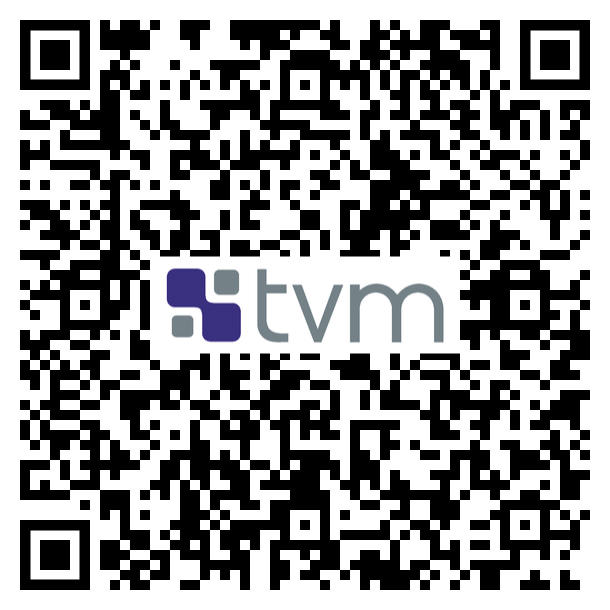

# Thank you for your attention!

Email: egor.churaev@deelvin.com

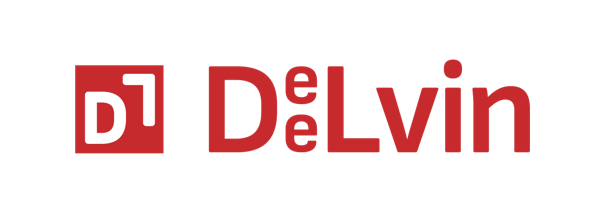